In [238]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [239]:
car = pd.read_excel("dulieuxeoriginal.xlsx")
car

,Hãng xe,Tên xe,Phiên bản,Năm sản xuất,Xuất xứ,Tình trạng,Số km đã đi (km),Dòng xe,Giá tiền,Ngoại thất,Nội thất,Số cửa,Số chỗ ngồi,Hộp số,Dẫn động,Nhiên liệu,Mức tiêu thụ nhiên liệu (L/100Km),Link bài viết
0,Hyundai,Kona,2.0 AT,2020.0,Lắp ráp trong nước,Đã sử dụng,43500.0,Crossover,489000000,Đỏ,Đen,5,5,Số tự động,FWD (Front Wheel Drive) – Hệ thống dẫn động cầ...,Xăng,8.0,https://bonbanh.com/xe-hyundai-kona-2.0-at-202...
1,Hyundai,SantaFe,Premium 2.2L,2019.0,Lắp ráp trong nước,Đã sử dụng,0.0,SUV,933000000,Đen,Nâu,5,5,Số tự động,AWD (All Wheel Drive) – Hệ thống dẫn động 4 bá...,Dầu,6.9,https://bonbanh.com/xe-hyundai-santafe-premium...
2,Hyundai,i10,Grand 1.2 AT,2018.0,Lắp ráp trong nước,Đã sử dụng,76000.0,Sedan,320000000,Trắng,Ghi,4,5,Số tự động,FWD (Front Wheel Drive) – Hệ thống dẫn động cầ...,Xăng,5.4,https://bonbanh.com/xe-hyundai-i10-grand-1.2-a...
3,Hyundai,Tucson,2.0 AT CRDi Đặc biệt,2023.0,Lắp ráp trong nước,Xe mới,0.0,Crossover,975000000,Trắng,Đen,5,5,Số tự động,FWD (Front Wheel Drive) – Hệ thống dẫn động cầ...,Dầu,8.1,https://bonbanh.com/xe-hyundai-tucson-2.0-at-c...
4,Hyundai,SantaFe,2.2L,2015.0,Lắp ráp trong nước,Đã sử dụng,120000.0,SUV,666000000,Đen,Đen,5,5,Số tự động,4WD (Four Wheel Drive) – Hệ thống dẫn động 4 b...,Dầu,7.1,https://bonbanh.com/xe-hyundai-santafe-2.2l-4w...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2619,Kia,Sorento,Kia Sorento Premium 2.2 AT AWD 2021,2021.0,Lắp ráp trong nước,Đã sử dụng,0.0,SUV,1000000000000000,Trắng,Kem,5,7,Số tự động,AWD (All Wheel Drive) – Hệ thống dẫn động 4 bá...,Dầu,1.0,https://bonbanh.com/xe-kia-sorento-premium-2.2...
2620,Kia,Cerato,Kia Cerato 2.0 AT Premium 2019 car,2019.0,Lắp ráp trong nước,Đã sử dụng,30.0,Sedan,575000000000,Đen,Nhiều Màu,4,5,Số tự động,FWD (Front Wheel Drive) – Hệ thống dẫn động cầ...,Xăng,6.0,https://bonbanh.com/xe-kia-cerato-2.0-at-premi...
2621,Mazda,CX8,Mazda CX8 Luxury 2020 car,2020.0,Lắp ráp trong nước,Đã sử dụng,0.0,SUV,899000000000,Trắng,Đen,5,7,Số tự động,FWD (Front Wheel Drive) – Hệ thống dẫn động cầ...,Xăng,1.0,https://bonbanh.com/xe-mazda-cx8-luxury-2020-4...
2622,Toyota,Camry,Toyota Camry 2.4G 2010,2010.0,Lắp ráp trong nước,Đã sử dụng,90.0,Sedan,450000000000,Xanh,Kem,4,5,Số tự động,FWD (Front Wheel Drive) – Hệ thống dẫn động cầ...,Xăng,1.0,https://bonbanh.com/xe-toyota-camry-2.4g-2010-...


# Data cleaning

In [240]:
# data information
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2624 entries, 0 to 2623
Data columns (total 18 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Hãng xe                            2624 non-null   object 
 1   Tên xe                             2624 non-null   object 
 2   Phiên bản                          2624 non-null   object 
 3   Năm sản xuất                       2620 non-null   float64
 4   Xuất xứ                            2624 non-null   object 
 5   Tình trạng                         2624 non-null   object 
 6   Số km đã đi (km)                   2624 non-null   float64
 7   Dòng xe                            2624 non-null   object 
 8   Giá tiền                           2624 non-null   int64  
 9   Ngoại thất                         2623 non-null   object 
 10  Nội thất                           2624 non-null   object 
 11  Số cửa                             2624 non-null   int64

In [241]:
car.drop(columns= ['Link bài viết'], inplace= True)

In [242]:
car.drop_duplicates(inplace = True)

In [243]:
# in column hộp số, số tay has the same meaning with số sàn, now fix it
def change_name(a,b):
    car['Hộp số'].replace(a,b,inplace = True)

change_name('Số tay','Số Sàn')

In [244]:
car['Hộp số'].value_counts()

Hộp số
Số tự động    2326
Số Sàn         242
Name: count, dtype: int64

# fix the value of column Số km đã đi(km)

In [245]:
# fix the value of column Số km đã đi(km)
new_km = []
for km in car['Số km đã đi (km)']:
    if km >= 10000 and km < 100000:
        new_km.append(km/10)
    elif km >= 100000 and km <= 800000:
        new_km.append(km/100)
    elif km > 800000:
        new_km.append(0)
    else:
        new_km.append(km)

car['Số km đã đi (km)'] = new_km

In [246]:
car[car['Số km đã đi (km)'] >= 100000]

,Hãng xe,Tên xe,Phiên bản,Năm sản xuất,Xuất xứ,Tình trạng,Số km đã đi (km),Dòng xe,Giá tiền,Ngoại thất,Nội thất,Số cửa,Số chỗ ngồi,Hộp số,Dẫn động,Nhiên liệu,Mức tiêu thụ nhiên liệu (L/100Km)


In [247]:
car.drop(car[car['Số km đã đi (km)'] == 0].index, inplace = True)

{'whiskers': [<matplotlib.lines.Line2D at 0x1494f59a3d0>,
 'caps': [<matplotlib.lines.Line2D at 0x1494f598610>,
 'boxes': [<matplotlib.lines.Line2D at 0x1494f5993d0>],
 'medians': [<matplotlib.lines.Line2D at 0x1494f59b010>],
 'fliers': [<matplotlib.lines.Line2D at 0x1494f5a0390>],
 'means': []}

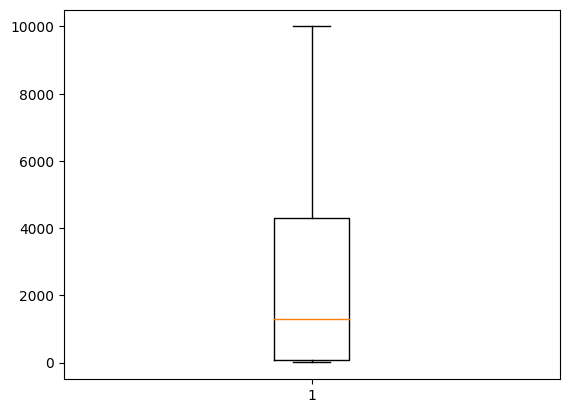

In [248]:
plt.boxplot(car['Số km đã đi (km)'])

# Fix the outlier of column Mức tiêu thụ nhiên liệu.

{'whiskers': [<matplotlib.lines.Line2D at 0x1494f297f90>,
 'caps': [<matplotlib.lines.Line2D at 0x1494ea43350>,
 'boxes': [<matplotlib.lines.Line2D at 0x1494f295210>],
 'medians': [<matplotlib.lines.Line2D at 0x1494ea70410>],
 'fliers': [<matplotlib.lines.Line2D at 0x1494eb4f6d0>],
 'means': []}

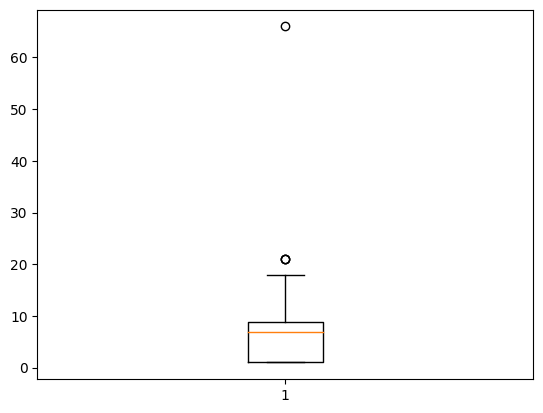

In [249]:
plt.boxplot(car['Mức tiêu thụ nhiên liệu (L/100Km)'])

In [250]:
car[car['Mức tiêu thụ nhiên liệu (L/100Km)'] >= 20]

,Hãng xe,Tên xe,Phiên bản,Năm sản xuất,Xuất xứ,Tình trạng,Số km đã đi (km),Dòng xe,Giá tiền,Ngoại thất,Nội thất,Số cửa,Số chỗ ngồi,Hộp số,Dẫn động,Nhiên liệu,Mức tiêu thụ nhiên liệu (L/100Km)
557,Mercedes,S Class,S400L,2016.0,Lắp ráp trong nước,Đã sử dụng,6000.0,Sedan,1850000000,Trắng,Nâu,4,5,Số tự động,RFD(Rear-Wheel Drive) - Dẫn động cầu sau,Xăng,21.0
558,Mercedes,S Class,S400L,2015.0,Lắp ráp trong nước,Đã sử dụng,8000.0,Sedan,1550000000,Đen,Nâu,4,5,Số tự động,RFD(Rear-Wheel Drive) - Dẫn động cầu sau,Xăng,21.0
560,Mercedes,S Class,S400L,2016.0,Lắp ráp trong nước,Đã sử dụng,7000.0,Sedan,1520000000,Đen,Đen,4,5,Số tự động,RFD(Rear-Wheel Drive) - Dẫn động cầu sau,Xăng,21.0
2368,Ford,EcoSport,Ford EcoSport Titanium 1.5L AT 2015,2015.0,Lắp ráp trong nước,Đã sử dụng,60.0,SUV,1989000000000,Trắng,Xám,5,5,Số tự động,FWD (Front Wheel Drive) – Hệ thống dẫn động cầ...,Xăng,66.0


# fix the price of the car detailly according each type of car company

{'whiskers': [<matplotlib.lines.Line2D at 0x1494f10d150>,
 'caps': [<matplotlib.lines.Line2D at 0x1494f10e310>,
 'boxes': [<matplotlib.lines.Line2D at 0x1494f10c450>],
 'medians': [<matplotlib.lines.Line2D at 0x1494f0fc810>],
 'fliers': [<matplotlib.lines.Line2D at 0x1494f0fe010>],
 'means': []}

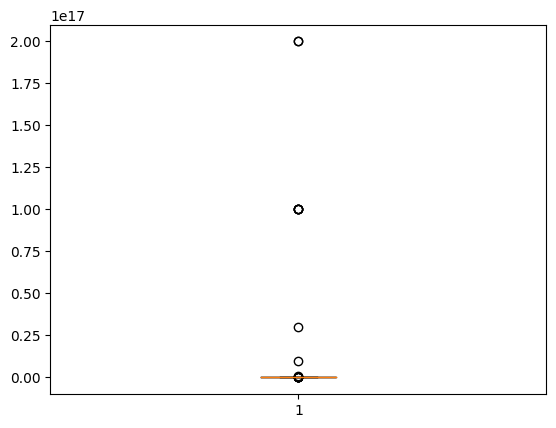

In [251]:
plt.boxplot(car['Giá tiền'])

In [252]:
car['Hãng xe'].value_counts()

Hãng xe
Mercedes         115
Mercedes Benz     95
Toyota            90
Honda             77
Audi              74
Hyundai           63
Porsche           56
LandRover         49
VinFast           48
Volvo             42
Lexus             40
Ford              39
BMW               18
Peugeot           15
Kia               15
Volkswagen        15
Mazda              9
Chevrolet          8
Lamborghini        6
Nissan             6
Mitsubishi         6
McLaren            6
Bentley            5
Ferrari            3
Jaguar             3
Rolls Royce        2
Daewoo             2
Cadillac           1
Isuzu              1
Jeep               1
Name: count, dtype: int64

# Mercedes

In [253]:
# C class
car[(car['Hãng xe'] == 'Mercedes') & (car['Tên xe'] == 'C Class')]

,Hãng xe,Tên xe,Phiên bản,Năm sản xuất,Xuất xứ,Tình trạng,Số km đã đi (km),Dòng xe,Giá tiền,Ngoại thất,Nội thất,Số cửa,Số chỗ ngồi,Hộp số,Dẫn động,Nhiên liệu,Mức tiêu thụ nhiên liệu (L/100Km)
480,Mercedes,C Class,C180 AMG 2021,2021.0,Lắp ráp trong nước,Đã sử dụng,1800.0,Sedan,1150000000,Trắng,Kem,4,5,Số tự động,RFD(Rear-Wheel Drive) - Dẫn động cầu sau,Xăng,6.00
481,Mercedes,C Class,C250 Exclusive,2015.0,Lắp ráp trong nước,Đã sử dụng,4800.0,Sedan,799000000,Trắng,Kem,4,5,Số tự động,RFD(Rear-Wheel Drive) - Dẫn động cầu sau,Xăng,5.60
486,Mercedes,C Class,C300 AMG First Edition,2022.0,Nhập khẩu,Đã sử dụng,1500.0,Sedan,1797000000,Đen,Đen,4,5,Số tự động,RFD(Rear-Wheel Drive) - Dẫn động cầu sau,Xăng,7.71
487,Mercedes,C Class,C200 Avantgarde Plus,2022.0,Lắp ráp trong nước,Đã sử dụng,9000.0,Sedan,1599000000,Trắng,Đen,4,5,Số tự động,RFD(Rear-Wheel Drive) - Dẫn động cầu sau,Xăng,8.86
488,Mercedes,C Class,C180 AMG,2021.0,Lắp ráp trong nước,Đã sử dụng,2800.0,Sedan,1390000000,Trắng,Đen,4,5,Số tự động,RFD(Rear-Wheel Drive) - Dẫn động cầu sau,Xăng,6.00
489,Mercedes,C Class,C250 Exclusive,2016.0,Lắp ráp trong nước,Đã sử dụng,6000.0,Sedan,730000000,Xanh,Đen,4,5,Số tự động,RFD(Rear-Wheel Drive) - Dẫn động cầu sau,Xăng,6.00


In [254]:
# S class
car[(car['Hãng xe'] == 'Mercedes') & (car['Tên xe'] == 'S Class')]

,Hãng xe,Tên xe,Phiên bản,Năm sản xuất,Xuất xứ,Tình trạng,Số km đã đi (km),Dòng xe,Giá tiền,Ngoại thất,Nội thất,Số cửa,Số chỗ ngồi,Hộp số,Dẫn động,Nhiên liệu,Mức tiêu thụ nhiên liệu (L/100Km)
539,Mercedes,S Class,S450,2022.0,Nhập khẩu,Đã sử dụng,7000.0,Sedan,4199000000,Đen,Đen,4,5,Số tự động,RFD(Rear-Wheel Drive) - Dẫn động cầu sau,Xăng,8.90
540,Mercedes,S Class,S450L Luxury,2017.0,Lắp ráp trong nước,Đã sử dụng,2700.0,Sedan,2350000000,Đen,Đen,4,5,Số tự động,RFD(Rear-Wheel Drive) - Dẫn động cầu sau,Xăng,10.46
541,Mercedes,S Class,S500L,2014.0,Lắp ráp trong nước,Đã sử dụng,5712.7,Sedan,1480000000,Trắng,Nâu,4,5,Số tự động,RFD(Rear-Wheel Drive) - Dẫn động cầu sau,Xăng,8.60
542,Mercedes,S Class,S400L,2016.0,Lắp ráp trong nước,Đã sử dụng,3000.0,Sedan,1750000000,Đen,Kem,4,5,Số tự động,RFD(Rear-Wheel Drive) - Dẫn động cầu sau,Xăng,7.60
543,Mercedes,S Class,S400L,2016.0,Lắp ráp trong nước,Đã sử dụng,5000.0,Sedan,1658000000,Đen,Nâu,4,5,Số tự động,RFD(Rear-Wheel Drive) - Dẫn động cầu sau,Xăng,10.46
546,Mercedes,S Class,S450,2021.0,Nhập khẩu,Đã sử dụng,1190.0,Sedan,4198000000,Đen,Đen,4,5,Số tự động,RFD(Rear-Wheel Drive) - Dẫn động cầu sau,Xăng,10.46
547,Mercedes,S Class,S65 AMG,2010.0,Nhập khẩu,Đã sử dụng,6000.0,Sedan,2300000000,Đen,Vàng,4,5,Số tự động,RFD(Rear-Wheel Drive) - Dẫn động cầu sau,Xăng,10.00
548,Mercedes,S Class,Maybach S450,2017.0,Nhập khẩu,Đã sử dụng,1700.0,Sedan,4950000000,Trắng,Đen,4,5,Số tự động,RFD(Rear-Wheel Drive) - Dẫn động cầu sau,Xăng,11.79
549,Mercedes,S Class,S500L,2014.0,Lắp ráp trong nước,Đã sử dụng,8000.0,Sedan,1560000000,Đen,Nâu,4,5,Số tự động,RFD(Rear-Wheel Drive) - Dẫn động cầu sau,Xăng,8.90
550,Mercedes,S Class,S450L Luxury,2018.0,Lắp ráp trong nước,Đã sử dụng,6200.0,Sedan,2750000000,Đen,Kem,4,5,Số tự động,RFD(Rear-Wheel Drive) - Dẫn động cầu sau,Xăng,8.30


In [255]:
# A class
car[(car['Hãng xe'] == 'Mercedes') & (car['Tên xe'] == 'A class')]


,Hãng xe,Tên xe,Phiên bản,Năm sản xuất,Xuất xứ,Tình trạng,Số km đã đi (km),Dòng xe,Giá tiền,Ngoại thất,Nội thất,Số cửa,Số chỗ ngồi,Hộp số,Dẫn động,Nhiên liệu,Mức tiêu thụ nhiên liệu (L/100Km)
625,Mercedes,A class,A200,2013.0,Nhập khẩu,Đã sử dụng,5000.0,Hatchback,479000000,Đỏ,Đen,4,5,Số tự động,4WD (Four Wheel Drive) – Hệ thống dẫn động 4 b...,Xăng,6.00
626,Mercedes,A class,A35 AMG 4Matic,2022.0,Nhập khẩu,Đã sử dụng,1500.0,Sedan,1898000000,Đỏ,Đen,4,5,Số tự động,AWD (All Wheel Drive) – Hệ thống dẫn động 4 bá...,Xăng,8.89
627,Mercedes,A class,A35 AMG 4Matic,2020.0,Nhập khẩu,Đã sử dụng,1000.0,Sedan,1499000000,Xanh,Kem,4,5,Số tự động,AWD (All Wheel Drive) – Hệ thống dẫn động 4 bá...,Xăng,8.89
628,Mercedes,A class,A200,2017.0,Nhập khẩu,Đã sử dụng,5000.0,Hatchback,485000000,Xanh,Kem,4,5,Số tự động,FWD (Front Wheel Drive) – Hệ thống dẫn động cầ...,Xăng,6.00
630,Mercedes,A class,A35 AMG 4Matic,2023.0,Nhập khẩu,Đã sử dụng,800.0,Sedan,1898000000,Đỏ,Đen,4,5,Số tự động,AWD (All Wheel Drive) – Hệ thống dẫn động 4 bá...,Xăng,8.89


In [256]:
# G class
car[(car['Hãng xe'] == 'Mercedes') & (car['Tên xe'] == 'G class')]

,Hãng xe,Tên xe,Phiên bản,Năm sản xuất,Xuất xứ,Tình trạng,Số km đã đi (km),Dòng xe,Giá tiền,Ngoại thất,Nội thất,Số cửa,Số chỗ ngồi,Hộp số,Dẫn động,Nhiên liệu,Mức tiêu thụ nhiên liệu (L/100Km)
567,Mercedes,G class,G63 AMG,2021.0,Nhập khẩu,Đã sử dụng,1000.0,SUV,10600000000,Đen,Đỏ,5,5,Số tự động,AWD (All Wheel Drive) – Hệ thống dẫn động 4 bá...,Xăng,10.0
570,Mercedes,G class,G63 AMG,2021.0,Nhập khẩu,Đã sử dụng,1800.0,SUV,10000000000,Trắng,Nâu,5,5,Số tự động,AWD (All Wheel Drive) – Hệ thống dẫn động 4 bá...,Xăng,8.0
571,Mercedes,G class,G63 AMG,2022.0,Nhập khẩu,Đã sử dụng,8800.0,SUV,10399000000,Đỏ,Kem,5,5,Số tự động,AWD (All Wheel Drive) – Hệ thống dẫn động 4 bá...,Xăng,13.3
572,Mercedes,G class,G63 AMG,2021.0,Nhập khẩu,Đã sử dụng,6000.0,SUV,10300000000,Đỏ,Kem,5,5,Số tự động,AWD (All Wheel Drive) – Hệ thống dẫn động 4 bá...,Xăng,13.1
573,Mercedes,G class,G63 AMG,2020.0,Nhập khẩu,Đã sử dụng,4000.0,SUV,9800000000,Đỏ,Kem,5,5,Số tự động,AWD (All Wheel Drive) – Hệ thống dẫn động 4 bá...,Xăng,13.1
574,Mercedes,G class,G63 AMG,2023.0,Nhập khẩu,Đã sử dụng,5700.0,SUV,12500000000,Đen,Đỏ,5,5,Số tự động,AWD (All Wheel Drive) – Hệ thống dẫn động 4 bá...,Xăng,13.1
575,Mercedes,G class,G63 AMG,2021.0,Nhập khẩu,Đã sử dụng,1400.0,SUV,9700000000,Xám,Đen,5,5,Số tự động,AWD (All Wheel Drive) – Hệ thống dẫn động 4 bá...,Xăng,13.1
576,Mercedes,G class,G63 AMG,2019.0,Nhập khẩu,Đã sử dụng,8000.0,SUV,10800000000,Đen,Đen,5,5,Số tự động,AWD (All Wheel Drive) – Hệ thống dẫn động 4 bá...,Xăng,13.1


In [257]:
# GLB
car[(car['Hãng xe'] == 'Mercedes') & (car['Tên xe'] == 'GLB')]

,Hãng xe,Tên xe,Phiên bản,Năm sản xuất,Xuất xứ,Tình trạng,Số km đã đi (km),Dòng xe,Giá tiền,Ngoại thất,Nội thất,Số cửa,Số chỗ ngồi,Hộp số,Dẫn động,Nhiên liệu,Mức tiêu thụ nhiên liệu (L/100Km)
616,Mercedes,GLB,GLB 35 4Matic,2022.0,Nhập khẩu,Đã sử dụng,500.0,SUV,2699000000,Đen,Đen,5,7,Số tự động,AWD (All Wheel Drive) – Hệ thống dẫn động 4 bá...,Xăng,11.80
617,Mercedes,GLB,GLB 35 4Matic,2022.0,Nhập khẩu,Đã sử dụng,300.0,SUV,2920000000,Đen,Đen,5,7,Số tự động,AWD (All Wheel Drive) – Hệ thống dẫn động 4 bá...,Xăng,11.82
618,Mercedes,GLB,GLB 200 AMG,2020.0,Nhập khẩu,Đã sử dụng,4200.0,SUV,1429000000,Trắng,Đen,5,7,Số tự động,AWD (All Wheel Drive) – Hệ thống dẫn động 4 bá...,Xăng,6.00
621,Mercedes,GLB,GLB 200 AMG,2021.0,Nhập khẩu,Đã sử dụng,3300.0,SUV,1538000000,Trắng,Nhiều Màu,5,7,Số tự động,AWD (All Wheel Drive) – Hệ thống dẫn động 4 bá...,Xăng,6.00
622,Mercedes,GLB,GLB 35 4Matic,2022.0,Nhập khẩu,Đã sử dụng,1000.0,SUV,2300000000,Đen,Đen,5,7,Số tự động,AWD (All Wheel Drive) – Hệ thống dẫn động 4 bá...,Xăng,6.00
623,Mercedes,GLB,GLB 200 AMG,2021.0,Nhập khẩu,Đã sử dụng,4200.0,SUV,1429000000,Trắng,Đen,5,7,Số tự động,AWD (All Wheel Drive) – Hệ thống dẫn động 4 bá...,Xăng,6.00


In [258]:
# GLC
car[(car['Hãng xe'] == 'Mercedes') & (car['Tên xe'] == 'GLC')]

,Hãng xe,Tên xe,Phiên bản,Năm sản xuất,Xuất xứ,Tình trạng,Số km đã đi (km),Dòng xe,Giá tiền,Ngoại thất,Nội thất,Số cửa,Số chỗ ngồi,Hộp số,Dẫn động,Nhiên liệu,Mức tiêu thụ nhiên liệu (L/100Km)
490,Mercedes,GLC,GLC300 4Matic,2022.0,Lắp ráp trong nước,Đã sử dụng,900.0,SUV,2239000000,Đen,Đen,5,5,Số tự động,AWD (All Wheel Drive) – Hệ thống dẫn động 4 bá...,Xăng,10.48
491,Mercedes,GLC,GLC200,2022.0,Lắp ráp trong nước,Đã sử dụng,1200.0,SUV,1689000000,Đen,Đen,5,5,Số tự động,RFD(Rear-Wheel Drive) - Dẫn động cầu sau,Xăng,8.77
492,Mercedes,GLC,GLC250 4Matic,2017.0,Lắp ráp trong nước,Đã sử dụng,8800.0,SUV,960000000,Xanh,Xanh,5,5,Số tự động,AWD (All Wheel Drive) – Hệ thống dẫn động 4 bá...,Xăng,8.00
493,Mercedes,GLC,GLC200 4Matic,2022.0,Lắp ráp trong nước,Đã sử dụng,1300.0,SUV,1790000000,Trắng,Đen,5,5,Số tự động,AWD (All Wheel Drive) – Hệ thống dẫn động 4 bá...,Xăng,8.77
494,Mercedes,GLC,GLC 300 4Matic,2017.0,Lắp ráp trong nước,Đã sử dụng,4800.0,SUV,1460000000,Đỏ,Đen,4,5,Số tự động,AWD (All Wheel Drive) – Hệ thống dẫn động 4 bá...,Xăng,8.90
496,Mercedes,GLC,GLC 300 4Matic,2019.0,Lắp ráp trong nước,Đã sử dụng,4000.0,SUV,1380000000,Xanh,Xanh,5,5,Số tự động,AWD (All Wheel Drive) – Hệ thống dẫn động 4 bá...,Xăng,7.90
497,Mercedes,GLC,GLC 300 4Matic,2023.0,Lắp ráp trong nước,Đã sử dụng,1000.0,SUV,2159000000,Đen,Nâu,5,5,Số tự động,AWD (All Wheel Drive) – Hệ thống dẫn động 4 bá...,Xăng,10.80
498,Mercedes,GLC,GLC200 4Matic,2020.0,Lắp ráp trong nước,Đã sử dụng,1400.0,SUV,1530000000,Trắng,Kem,5,5,Số tự động,AWD (All Wheel Drive) – Hệ thống dẫn động 4 bá...,Xăng,8.77
499,Mercedes,GLC,GLC200 4Matic,2023.0,Lắp ráp trong nước,Đã sử dụng,1000.0,SUV,2159000000,Đen,Nâu,5,5,Số tự động,AWD (All Wheel Drive) – Hệ thống dẫn động 4 bá...,Xăng,10.80
500,Mercedes,GLC,GLC250 4Matic,2019.0,Lắp ráp trong nước,Đã sử dụng,1300.0,SUV,1290000000,Trắng,Kem,5,5,Số tự động,AWD (All Wheel Drive) – Hệ thống dẫn động 4 bá...,Xăng,7.30


In [259]:
# GLE Class
car[(car['Hãng xe'] == 'Mercedes') & (car['Tên xe'] == 'GLE Class')]

,Hãng xe,Tên xe,Phiên bản,Năm sản xuất,Xuất xứ,Tình trạng,Số km đã đi (km),Dòng xe,Giá tiền,Ngoại thất,Nội thất,Số cửa,Số chỗ ngồi,Hộp số,Dẫn động,Nhiên liệu,Mức tiêu thụ nhiên liệu (L/100Km)
609,Mercedes,GLE Class,GLE450 4Matic,2022.0,Nhập khẩu,Đã sử dụng,5000.0,SUV,4399000000,Trắng,Đen,5,7,Số tự động,AWD (All Wheel Drive) – Hệ thống dẫn động 4 bá...,Xăng,8.6
610,Mercedes,GLE Class,GLE400 4Matic,2016.0,Nhập khẩu,Đã sử dụng,2800.0,SUV,1680000000,Trắng,Kem,5,7,Số tự động,AWD (All Wheel Drive) – Hệ thống dẫn động 4 bá...,Xăng,11.3
611,Mercedes,GLE Class,GLE 400 4Matic,2016.0,Nhập khẩu,Đã sử dụng,2800.0,SUV,1681000000,Trắng,Kem,5,7,Số tự động,AWD (All Wheel Drive) – Hệ thống dẫn động 4 bá...,Xăng,11.3
612,Mercedes,GLE Class,GLE 400 4Matic,2015.0,Nhập khẩu,Đã sử dụng,9400.0,SUV,1398000000,Kem,Kem,5,7,Số tự động,AWD (All Wheel Drive) – Hệ thống dẫn động 4 bá...,Xăng,11.3
614,Mercedes,GLE Class,GLE 43 AMG 4Matic,2018.0,Nhập khẩu,Đã sử dụng,2300.0,Coupe,2599000000,Đỏ,Đen,5,7,Số tự động,AWD (All Wheel Drive) – Hệ thống dẫn động 4 bá...,Xăng,8.9


In [260]:
# GLS
car[(car['Hãng xe'] == 'Mercedes') & (car['Tên xe'] == 'GLS')]

,Hãng xe,Tên xe,Phiên bản,Năm sản xuất,Xuất xứ,Tình trạng,Số km đã đi (km),Dòng xe,Giá tiền,Ngoại thất,Nội thất,Số cửa,Số chỗ ngồi,Hộp số,Dẫn động,Nhiên liệu,Mức tiêu thụ nhiên liệu (L/100Km)
599,Mercedes,GLS,GLS450 4Matic,2020.0,Nhập khẩu,Đã sử dụng,6000.0,SUV,3700000000,Xanh,Đen,5,7,Số tự động,AWD (All Wheel Drive) – Hệ thống dẫn động 4 bá...,Xăng,11.7
602,Mercedes,GLS,GLS450 4Matic,2023.0,Nhập khẩu,Xe mới,9.0,SUV,5149000000,Đen,Đen,5,7,Số tự động,AWD (All Wheel Drive) – Hệ thống dẫn động 4 bá...,Xăng,11.7
603,Mercedes,GLS,GLS400 4Matic,2017.0,Nhập khẩu,Đã sử dụng,7600.0,SUV,1790000000,Đen,Kem,5,7,Số tự động,AWD (All Wheel Drive) – Hệ thống dẫn động 4 bá...,Xăng,11.7
604,Mercedes,GLS,GLS400 4Matic,2016.0,Nhập khẩu,Đã sử dụng,1030.0,SUV,1980000000,Nâu,Nâu,5,7,Số tự động,AWD (All Wheel Drive) – Hệ thống dẫn động 4 bá...,Xăng,11.7
605,Mercedes,GLS,GLS450 4Matic,2019.0,Nhập khẩu,Đã sử dụng,4700.0,SUV,3920000000,Đen,Nâu,5,7,Số tự động,AWD (All Wheel Drive) – Hệ thống dẫn động 4 bá...,Xăng,11.7
606,Mercedes,GLS,GLS450 4Matic,2020.0,Nhập khẩu,Đã sử dụng,3700.0,SUV,3990000000,Trắng,Kem,5,7,Số tự động,AWD (All Wheel Drive) – Hệ thống dẫn động 4 bá...,Xăng,11.0
607,Mercedes,GLS,GLS400 4Matic,2016.0,Nhập khẩu,Đã sử dụng,8700.0,SUV,1950000000,Đen,Kem,5,7,Số tự động,4WD (Four Wheel Drive) – Hệ thống dẫn động 4 b...,Xăng,11.7


In [261]:
# Maybach
car[(car['Hãng xe'] == 'Mercedes') & (car['Tên xe'] == 'Maybach')]

,Hãng xe,Tên xe,Phiên bản,Năm sản xuất,Xuất xứ,Tình trạng,Số km đã đi (km),Dòng xe,Giá tiền,Ngoại thất,Nội thất,Số cửa,Số chỗ ngồi,Hộp số,Dẫn động,Nhiên liệu,Mức tiêu thụ nhiên liệu (L/100Km)
585,Mercedes,Maybach,GLS 480 4Matic,2022.0,Nhập khẩu,Đã sử dụng,1080.0,SUV,8199000000,Trắng,Nâu,5,4,Số tự động,AWD (All Wheel Drive) – Hệ thống dẫn động 4 bá...,Xăng,12.0
587,Mercedes,Maybach,S450 4Matic,2020.0,Nhập khẩu,Đã sử dụng,1080.0,Sedan,5999000000,Xanh,Kem,5,4,Số tự động,AWD (All Wheel Drive) – Hệ thống dẫn động 4 bá...,Xăng,10.3
588,Mercedes,Maybach,S450 4Matic,2017.0,Nhập khẩu,Đã sử dụng,5900.0,Sedan,4300000000,Đen,Đen,5,4,Số tự động,4WD (Four Wheel Drive) – Hệ thống dẫn động 4 b...,Xăng,10.3
590,Mercedes,Maybach,GLS 480 4Matic,2022.0,Nhập khẩu,Đã sử dụng,1100.0,SUV,8199000000,Trắng,Nâu,5,4,Số tự động,AWD (All Wheel Drive) – Hệ thống dẫn động 4 bá...,Xăng,10.3
591,Mercedes,Maybach,S500,2017.0,Nhập khẩu,Đã sử dụng,1600.0,Sedan,4900000000,Xanh,Kem,5,4,Số tự động,RFD(Rear-Wheel Drive) - Dẫn động cầu sau,Xăng,8.9
592,Mercedes,Maybach,S450 4Matic,2017.0,Nhập khẩu,Đã sử dụng,3100.0,Sedan,3799000000,Đen,Đen,5,4,Số tự động,AWD (All Wheel Drive) – Hệ thống dẫn động 4 bá...,Xăng,10.0
593,Mercedes,Maybach,S400,2016.0,Nhập khẩu,Đã sử dụng,7000.0,Sedan,3150000000,Đen,Nâu,5,4,Số tự động,RFD(Rear-Wheel Drive) - Dẫn động cầu sau,Xăng,8.5
596,Mercedes,Maybach,S450 4Matic,2020.0,Nhập khẩu,Đã sử dụng,2500.0,Sedan,5999000000,Trắng,Kem,4,4,Số tự động,AWD (All Wheel Drive) – Hệ thống dẫn động 4 bá...,Xăng,11.7
597,Mercedes,Maybach,S500L,2017.0,Nhập khẩu,Đã sử dụng,1600.0,Sedan,4900000000,Xanh,Kem,4,5,Số tự động,RFD(Rear-Wheel Drive) - Dẫn động cầu sau,Xăng,8.9


# Huyndai

In [262]:
# Accent
car[(car['Hãng xe'] == 'Hyundai') & (car['Tên xe'] == 'Accent')]

,Hãng xe,Tên xe,Phiên bản,Năm sản xuất,Xuất xứ,Tình trạng,Số km đã đi (km),Dòng xe,Giá tiền,Ngoại thất,Nội thất,Số cửa,Số chỗ ngồi,Hộp số,Dẫn động,Nhiên liệu,Mức tiêu thụ nhiên liệu (L/100Km)
17,Hyundai,Accent,1.4 AT,2022.0,Lắp ráp trong nước,Đã sử dụng,1300.0,Sedan,445000000,Đỏ,Kem,4,5,Số tự động,FWD (Front Wheel Drive) – Hệ thống dẫn động cầ...,Xăng,5.65
18,Hyundai,Accent,1.4 AT,2020.0,Lắp ráp trong nước,Đã sử dụng,4000.0,Sedan,445000000,Đỏ,Kem,4,5,Số tự động,FWD (Front Wheel Drive) – Hệ thống dẫn động cầ...,Xăng,5.65
20,Hyundai,Accent,1.4 MT,2018.0,Lắp ráp trong nước,Đã sử dụng,8200.0,Sedan,325000000,Trắng,Kem,4,5,Số Sàn,FWD (Front Wheel Drive) – Hệ thống dẫn động cầ...,Xăng,6.19
22,Hyundai,Accent,1.4 AT,2022.0,Nhập khẩu,Đã sử dụng,2000.0,Sedan,465000000,Đỏ,Kem,4,5,Số tự động,FWD (Front Wheel Drive) – Hệ thống dẫn động cầ...,Xăng,5.65
24,Hyundai,Accent,1.4 AT,2014.0,Nhập khẩu,Đã sử dụng,8568.9,Hatchback,319000000,Trắng,Xám,5,5,Số tự động,FWD (Front Wheel Drive) – Hệ thống dẫn động cầ...,Xăng,7.00
27,Hyundai,Accent,1.4 AT,2022.0,Lắp ráp trong nước,Đã sử dụng,5200.0,Sedan,455000000,Trắng,Đen,4,5,Số tự động,FWD (Front Wheel Drive) – Hệ thống dẫn động cầ...,Xăng,5.65
30,Hyundai,Accent,1.4 AT,2021.0,Lắp ráp trong nước,Đã sử dụng,1000.0,Sedan,475000000,Đen,Kem,4,5,Số tự động,FWD (Front Wheel Drive) – Hệ thống dẫn động cầ...,Xăng,6.20
39,Hyundai,Accent,1.4 AT,2022.0,Lắp ráp trong nước,Đã sử dụng,1200.0,Sedan,460000000,Đỏ,Kem,4,5,Số tự động,FWD (Front Wheel Drive) – Hệ thống dẫn động cầ...,Xăng,7.00
47,Hyundai,Accent,1.4 MT,2022.0,Lắp ráp trong nước,Đã sử dụng,1100.0,Sedan,385000000,Trắng,Nhiều Màu,4,5,Số Sàn,FWD (Front Wheel Drive) – Hệ thống dẫn động cầ...,Xăng,5.00
48,Hyundai,Accent,1.4 AT,2021.0,Lắp ráp trong nước,Đã sử dụng,2000.0,Sedan,479000000,Đỏ,Kem,4,5,Số tự động,FWD (Front Wheel Drive) – Hệ thống dẫn động cầ...,Xăng,6.20


In [263]:
# Avante
car[(car['Hãng xe'] == 'Hyundai') & (car['Tên xe'] == 'Avante')]

,Hãng xe,Tên xe,Phiên bản,Năm sản xuất,Xuất xứ,Tình trạng,Số km đã đi (km),Dòng xe,Giá tiền,Ngoại thất,Nội thất,Số cửa,Số chỗ ngồi,Hộp số,Dẫn động,Nhiên liệu,Mức tiêu thụ nhiên liệu (L/100Km)
1364,Hyundai,Avante,Hyundai Avante 1.6 MT 2012,2012.0,Lắp ráp trong nước,Đã sử dụng,150.0,Sedan,975000000000,Trắng,Nhiều Màu,4,5,Số Sàn,FWD (Front Wheel Drive) – Hệ thống dẫn động cầ...,Xăng,1.0


In [264]:
# the price is too high while the price of this car on bonbanh.com is only 100-200 millions VND
car.at[1364,'Giá tiền'] = 250000000

In [265]:
car[(car['Hãng xe'] == 'Hyundai') & (car['Tên xe'] == 'Avante')]

,Hãng xe,Tên xe,Phiên bản,Năm sản xuất,Xuất xứ,Tình trạng,Số km đã đi (km),Dòng xe,Giá tiền,Ngoại thất,Nội thất,Số cửa,Số chỗ ngồi,Hộp số,Dẫn động,Nhiên liệu,Mức tiêu thụ nhiên liệu (L/100Km)
1364,Hyundai,Avante,Hyundai Avante 1.6 MT 2012,2012.0,Lắp ráp trong nước,Đã sử dụng,150.0,Sedan,250000000,Trắng,Nhiều Màu,4,5,Số Sàn,FWD (Front Wheel Drive) – Hệ thống dẫn động cầ...,Xăng,1.0


In [266]:
# Creta

car[(car['Hãng xe'] == 'Hyundai') & (car['Tên xe'] == 'Creta')]

,Hãng xe,Tên xe,Phiên bản,Năm sản xuất,Xuất xứ,Tình trạng,Số km đã đi (km),Dòng xe,Giá tiền,Ngoại thất,Nội thất,Số cửa,Số chỗ ngồi,Hộp số,Dẫn động,Nhiên liệu,Mức tiêu thụ nhiên liệu (L/100Km)
10,Hyundai,Creta,1.5 AT,2022.0,Nhập khẩu,Đã sử dụng,3000.0,Crossover,599000000,Đỏ,Đen,5,5,Số tự động,FWD (Front Wheel Drive) – Hệ thống dẫn động cầ...,Xăng,6.17


In [267]:
# Custin
car[(car['Hãng xe'] == 'Hyundai') & (car['Tên xe'] == 'Custin')]

,Hãng xe,Tên xe,Phiên bản,Năm sản xuất,Xuất xứ,Tình trạng,Số km đã đi (km),Dòng xe,Giá tiền,Ngoại thất,Nội thất,Số cửa,Số chỗ ngồi,Hộp số,Dẫn động,Nhiên liệu,Mức tiêu thụ nhiên liệu (L/100Km)


In [268]:
# Elantra
car[(car['Hãng xe'] == 'Hyundai') & (car['Tên xe'] == 'Elantra')]

,Hãng xe,Tên xe,Phiên bản,Năm sản xuất,Xuất xứ,Tình trạng,Số km đã đi (km),Dòng xe,Giá tiền,Ngoại thất,Nội thất,Số cửa,Số chỗ ngồi,Hộp số,Dẫn động,Nhiên liệu,Mức tiêu thụ nhiên liệu (L/100Km)
16,Hyundai,Elantra,1.6 AT,2020.0,Lắp ráp trong nước,Đã sử dụng,9000.0,Sedan,505000000,Đỏ,Kem,4,5,Số tự động,FWD (Front Wheel Drive) – Hệ thống dẫn động cầ...,Xăng,7.35
21,Hyundai,Elantra,1.6 AT,2020.0,Lắp ráp trong nước,Đã sử dụng,9000.0,Sedan,505000000,Đỏ,Kem,4,5,Số tự động,FWD (Front Wheel Drive) – Hệ thống dẫn động cầ...,Xăng,6.90
34,Hyundai,Elantra,2.0 AT,2021.0,Lắp ráp trong nước,Đã sử dụng,1200.0,Sedan,565000000,Đen,Kem,4,5,Số tự động,FWD (Front Wheel Drive) – Hệ thống dẫn động cầ...,Xăng,7.00
1247,Hyundai,Elantra,Hyundai Elantra 1.6 MT 2017,2017.0,Lắp ráp trong nước,Đã sử dụng,11.0,Sedan,856000000000,Nâu,Nâu,4,5,Số Sàn,FWD (Front Wheel Drive) – Hệ thống dẫn động cầ...,Xăng,1.00
2356,Hyundai,Elantra,Hyundai Elantra 2.0 AT 2018,2018.0,Lắp ráp trong nước,Đã sử dụng,60.0,Sedan,1977000000000,Đen,Xám,4,5,Số tự động,FWD (Front Wheel Drive) – Hệ thống dẫn động cầ...,Xăng,7.00


In [269]:
car.loc[[1247,2356],'Giá tiền'] = [856000000,1977000000]

In [270]:
# genesis
car[(car['Hãng xe'] == 'Hyundai') & (car['Tên xe'] == 'Genesis')]

,Hãng xe,Tên xe,Phiên bản,Năm sản xuất,Xuất xứ,Tình trạng,Số km đã đi (km),Dòng xe,Giá tiền,Ngoại thất,Nội thất,Số cửa,Số chỗ ngồi,Hộp số,Dẫn động,Nhiên liệu,Mức tiêu thụ nhiên liệu (L/100Km)
1283,Hyundai,Genesis,Hyundai Genesis BH380 2009 car,2009.0,Nhập khẩu,Đã sử dụng,67.0,Sedan,893000000000,Đen,Đen,4,4,Số tự động,RFD(Rear-Wheel Drive) - Dẫn động cầu sau,Xăng,7.0


In [271]:
car.loc[1283,'Giá tiền'] = 893000000

In [272]:
# i10
car[(car['Hãng xe'] == 'Hyundai') & (car['Tên xe'] == 'i10')]

,Hãng xe,Tên xe,Phiên bản,Năm sản xuất,Xuất xứ,Tình trạng,Số km đã đi (km),Dòng xe,Giá tiền,Ngoại thất,Nội thất,Số cửa,Số chỗ ngồi,Hộp số,Dẫn động,Nhiên liệu,Mức tiêu thụ nhiên liệu (L/100Km)
2,Hyundai,i10,Grand 1.2 AT,2018.0,Lắp ráp trong nước,Đã sử dụng,7600.0,Sedan,320000000,Trắng,Ghi,4,5,Số tự động,FWD (Front Wheel Drive) – Hệ thống dẫn động cầ...,Xăng,5.4
23,Hyundai,i10,1.2MT,2019.0,Lắp ráp trong nước,Đã sử dụng,7000.0,Hatchback,219000000,Trắng,Trắng,5,5,Số Sàn,FWD (Front Wheel Drive) – Hệ thống dẫn động cầ...,Xăng,5.4
29,Hyundai,i10,1.2 MT,2015.0,Nhập khẩu,Đã sử dụng,8000.0,Sedan,235000000,Bạc,Đen,4,5,Số Sàn,FWD (Front Wheel Drive) – Hệ thống dẫn động cầ...,Xăng,6.6
31,Hyundai,i10,1.2 AT,2016.0,Nhập khẩu,Đã sử dụng,7200.0,Hatchback,290000000,Trắng,Nhiều Màu,5,5,Số tự động,FWD (Front Wheel Drive) – Hệ thống dẫn động cầ...,Xăng,6.0
45,Hyundai,i10,1.2 MT,2019.0,Lắp ráp trong nước,Đã sử dụng,4214.0,Sedan,300000000,Trắng,Nhiều Màu,4,5,Số Sàn,FWD (Front Wheel Drive) – Hệ thống dẫn động cầ...,Xăng,5.4
2615,Hyundai,i10,Hyundai i10 Grand 1.2 MT 2019,2019.0,Lắp ráp trong nước,Đã sử dụng,28.0,Sedan,310000000000,Trắng,Kem,5,5,Số Sàn,FWD (Front Wheel Drive) – Hệ thống dẫn động cầ...,Xăng,1.0


In [273]:
car.loc[2615,'Giá tiền'] = 310000000

In [274]:
# i10 Grand
car[(car['Hãng xe'] == 'Hyundai') & (car['Tên xe'] == 'i10 Grand')]

,Hãng xe,Tên xe,Phiên bản,Năm sản xuất,Xuất xứ,Tình trạng,Số km đã đi (km),Dòng xe,Giá tiền,Ngoại thất,Nội thất,Số cửa,Số chỗ ngồi,Hộp số,Dẫn động,Nhiên liệu,Mức tiêu thụ nhiên liệu (L/100Km)
7,Hyundai,i10 Grand,1.2 AT,2018.0,Lắp ráp trong nước,Đã sử dụng,3000.0,Sedan,325000000,Đỏ,Nhiều Màu,4,5,Số tự động,FWD (Front Wheel Drive) – Hệ thống dẫn động cầ...,Xăng,5.4


In [275]:
# Kona
car[(car['Hãng xe'] == 'Hyundai') & (car['Tên xe'] == 'Kona')]

,Hãng xe,Tên xe,Phiên bản,Năm sản xuất,Xuất xứ,Tình trạng,Số km đã đi (km),Dòng xe,Giá tiền,Ngoại thất,Nội thất,Số cửa,Số chỗ ngồi,Hộp số,Dẫn động,Nhiên liệu,Mức tiêu thụ nhiên liệu (L/100Km)
0,Hyundai,Kona,2.0 AT,2020.0,Lắp ráp trong nước,Đã sử dụng,4350.0,Crossover,489000000,Đỏ,Đen,5,5,Số tự động,FWD (Front Wheel Drive) – Hệ thống dẫn động cầ...,Xăng,8.0
38,Hyundai,Kona,2.0 ATH,2021.0,Lắp ráp trong nước,Đã sử dụng,2000.0,Crossover,599000000,Trắng,Đen,5,5,Số tự động,FWD (Front Wheel Drive) – Hệ thống dẫn động cầ...,Xăng,7.0
2307,Hyundai,Kona,Hyundai Kona 2.0 ATH 2019,2019.0,Lắp ráp trong nước,Đã sử dụng,38.0,Crossover,1928000000000,Nâu,Đen,5,5,Số tự động,FWD (Front Wheel Drive) – Hệ thống dẫn động cầ...,Xăng,1.0


In [276]:
# SantaFe
car[(car['Hãng xe'] == 'Hyundai') & (car['Tên xe'] == 'SantaFe')]

,Hãng xe,Tên xe,Phiên bản,Năm sản xuất,Xuất xứ,Tình trạng,Số km đã đi (km),Dòng xe,Giá tiền,Ngoại thất,Nội thất,Số cửa,Số chỗ ngồi,Hộp số,Dẫn động,Nhiên liệu,Mức tiêu thụ nhiên liệu (L/100Km)
4,Hyundai,SantaFe,2.2L,2015.0,Lắp ráp trong nước,Đã sử dụng,1200.00,SUV,666000000,Đen,Đen,5,5,Số tự động,4WD (Four Wheel Drive) – Hệ thống dẫn động 4 b...,Dầu,7.1
6,Hyundai,SantaFe,Cao cấp 2.5L HTRAC,2023.0,Lắp ráp trong nước,Đã sử dụng,1000.00,SUV,1179000000,Trắng,Nâu,5,5,Số tự động,AWD (All Wheel Drive) – Hệ thống dẫn động 4 bá...,Xăng,9.0
14,Hyundai,SantaFe,MLX,2009.0,Nhập khẩu,Đã sử dụng,1378.00,SUV,425000000,Bạc,Đen,6,5,Số tự động,RFD(Rear-Wheel Drive) - Dẫn động cầu sau,Dầu,8.0
36,Hyundai,SantaFe,2.4 L,2018.0,Lắp ráp trong nước,Đã sử dụng,6600.00,SUV,710000000,Trắng,Kem,5,5,Số tự động,4WD (Four Wheel Drive) – Hệ thống dẫn động 4 b...,Xăng,9.0
43,Hyundai,SantaFe,2.4L,2018.0,Lắp ráp trong nước,Đã sử dụng,8000.00,SUV,710000000,Cát,Kem,5,5,Số tự động,4WD (Four Wheel Drive) – Hệ thống dẫn động 4 b...,Xăng,7.5
1947,Hyundai,SantaFe,Hyundai SantaFe 2.4L 2013,2013.0,Nhập khẩu,Đã sử dụng,80.00,SUV,1560000000000,Bạc,Đen,5,7,Số tự động,FWD (Front Wheel Drive) – Hệ thống dẫn động cầ...,Xăng,1.0
2056,Hyundai,SantaFe,Hyundai SantaFe SLX 2009,2009.0,Nhập khẩu,Đã sử dụng,1256.36,SUV,1669000000000,Bạc,Nâu,5,7,Số tự động,FWD (Front Wheel Drive) – Hệ thống dẫn động cầ...,Dầu,1.0
2178,Hyundai,SantaFe,Hyundai SantaFe Premium 2.4L HTRAC 2020,2020.0,Lắp ráp trong nước,Đã sử dụng,36.00,SUV,1797000000000,Đen,Nâu,5,7,Số tự động,AWD (All Wheel Drive) – Hệ thống dẫn động 4 bá...,Xăng,7.0
2229,Hyundai,SantaFe,Hyundai SantaFe 2.2L 2013,2013.0,Nhập khẩu,Đã sử dụng,100.00,SUV,1849000000000,Bạc,Đen,5,7,Số tự động,FWD (Front Wheel Drive) – Hệ thống dẫn động cầ...,Dầu,1.0
2347,Hyundai,SantaFe,Hyundai SantaFe SLX 2009,2009.0,Nhập khẩu,Đã sử dụng,120.00,SUV,1968000000000,Đen,Đen,5,7,Số tự động,FWD (Front Wheel Drive) – Hệ thống dẫn động cầ...,Dầu,7.0


In [277]:
new_price = []
#if car car[(car['Hãng xe'] == 'Hyundai') & (car['Tên xe'] == 'SantaFe')]:
for price in car['Giá tiền']:
    if 355000000000 <= price <= 9000000000000:
        new_price.append(price / 1000)
    elif price == 100000000000000000:
        new_price.append(price / 100000000)
    else:
        new_price.append(price)
car['Giá tiền'] = new_price

In [278]:
# SantaFe Premium
car[(car['Hãng xe'] == 'Hyundai') & (car['Tên xe'] == 'SantaFe Premium')]

,Hãng xe,Tên xe,Phiên bản,Năm sản xuất,Xuất xứ,Tình trạng,Số km đã đi (km),Dòng xe,Giá tiền,Ngoại thất,Nội thất,Số cửa,Số chỗ ngồi,Hộp số,Dẫn động,Nhiên liệu,Mức tiêu thụ nhiên liệu (L/100Km)
37,Hyundai,SantaFe Premium,2.2 L,2020.0,Lắp ráp trong nước,Đã sử dụng,4500.0,SUV,930000000.0,Trắng,Nâu,5,5,Số tự động,4WD (Four Wheel Drive) – Hệ thống dẫn động 4 b...,Dầu,5.94


In [279]:
# Tucson
car[(car['Hãng xe'] == 'Hyundai') & (car['Tên xe'] == 'Tucson')]

,Hãng xe,Tên xe,Phiên bản,Năm sản xuất,Xuất xứ,Tình trạng,Số km đã đi (km),Dòng xe,Giá tiền,Ngoại thất,Nội thất,Số cửa,Số chỗ ngồi,Hộp số,Dẫn động,Nhiên liệu,Mức tiêu thụ nhiên liệu (L/100Km)
9,Hyundai,Tucson,2.0 AT,2020.0,Lắp ráp trong nước,Đã sử dụng,4400.00,Crossover,6.780000e+08,Trắng,Kem,5,5,Số tự động,FWD (Front Wheel Drive) – Hệ thống dẫn động cầ...,Xăng,8.0
11,Hyundai,Tucson,2.0 AT,2020.0,Lắp ráp trong nước,Đã sử dụng,6000.00,Crossover,7.550000e+08,Đen,Kem,5,5,Số tự động,FWD (Front Wheel Drive) – Hệ thống dẫn động cầ...,Dầu,8.0
12,Hyundai,Tucson,2.0 AT,2023.0,Lắp ráp trong nước,Đã sử dụng,7000.00,Crossover,8.800000e+08,Trắng,Đen,5,5,Số tự động,FWD (Front Wheel Drive) – Hệ thống dẫn động cầ...,Xăng,8.1
19,Hyundai,Tucson,2.0 AT,2018.0,Lắp ráp trong nước,Đã sử dụng,6000.00,Crossover,6.800000e+08,Trắng,Kem,5,5,Số tự động,FWD (Front Wheel Drive) – Hệ thống dẫn động cầ...,Dầu,5.2
32,Hyundai,Tucson,2.0 AT,2020.0,Lắp ráp trong nước,Đã sử dụng,2000.00,Crossover,7.550000e+08,Trắng,Kem,5,5,Số tự động,FWD (Front Wheel Drive) – Hệ thống dẫn động cầ...,Dầu,6.4
33,Hyundai,Tucson,1.6 AT Turbo,2023.0,Lắp ráp trong nước,Đã sử dụng,5000.00,Crossover,9.550000e+08,Đỏ,Nâu,5,5,Số tự động,AWD (All Wheel Drive) – Hệ thống dẫn động 4 bá...,Xăng,7.0
40,Hyundai,Tucson,1.6 AT,2021.0,Lắp ráp trong nước,Đã sử dụng,4500.00,Crossover,7.700000e+08,Đen,Kem,5,5,Số tự động,FWD (Front Wheel Drive) – Hệ thống dẫn động cầ...,Xăng,7.0
41,Hyundai,Tucson,2.0 AT,2014.0,Nhập khẩu,Đã sử dụng,1000.00,Crossover,4.600000e+08,Đen,Đen,5,5,Số tự động,FWD (Front Wheel Drive) – Hệ thống dẫn động cầ...,Xăng,7.0
44,Hyundai,Tucson,2.0 AT,2013.0,Nhập khẩu,Đã sử dụng,1100.00,Crossover,4.400000e+08,Đen,Đen,5,5,Số tự động,FWD (Front Wheel Drive) – Hệ thống dẫn động cầ...,Xăng,8.1
2096,Hyundai,Tucson,Hyundai Tucson LMX 2.0 eVGT 2009,2009.0,Nhập khẩu,Đã sử dụng,1659.28,Crossover,1.712000e+09,Bạc,Đen,5,5,Số tự động,FWD (Front Wheel Drive) – Hệ thống dẫn động cầ...,Dầu,5.0


In [280]:
# Veloster
car[(car['Hãng xe'] == 'Hyundai') & (car['Tên xe'] == 'Veloster')]

,Hãng xe,Tên xe,Phiên bản,Năm sản xuất,Xuất xứ,Tình trạng,Số km đã đi (km),Dòng xe,Giá tiền,Ngoại thất,Nội thất,Số cửa,Số chỗ ngồi,Hộp số,Dẫn động,Nhiên liệu,Mức tiêu thụ nhiên liệu (L/100Km)
28,Hyundai,Veloster,1.6 AT,2011.0,Nhập khẩu,Đã sử dụng,1900.0,Hatchback,465000000.0,Bạc,Đen,3,5,Số tự động,FWD (Front Wheel Drive) – Hệ thống dẫn động cầ...,Xăng,5.9


In [281]:
# Veracruz
car[(car['Hãng xe'] == 'Hyundai') & (car['Tên xe'] == 'Veracruz')]

,Hãng xe,Tên xe,Phiên bản,Năm sản xuất,Xuất xứ,Tình trạng,Số km đã đi (km),Dòng xe,Giá tiền,Ngoại thất,Nội thất,Số cửa,Số chỗ ngồi,Hộp số,Dẫn động,Nhiên liệu,Mức tiêu thụ nhiên liệu (L/100Km)
1048,Hyundai,Veracruz,Hyundai Veracruz 3.8 V6 2008,2008.0,Nhập khẩu,Đã sử dụng,90.0,SUV,6.560000e+08,Trắng,Xám,5,7,Số tự động,AWD (All Wheel Drive) – Hệ thống dẫn động 4 bá...,Xăng,1.0
2266,Hyundai,Veracruz,Hyundai Veracruz 3.0 V6 2007,2007.0,Nhập khẩu,Đã sử dụng,13.0,SUV,1.886000e+09,Đen,Đen,5,7,Số tự động,AWD (All Wheel Drive) – Hệ thống dẫn động 4 bá...,Dầu,7.0


# Audi

In [282]:
car[(car['Hãng xe'] == 'Audi') & (car['Tên xe'] == 'A4')]

,Hãng xe,Tên xe,Phiên bản,Năm sản xuất,Xuất xứ,Tình trạng,Số km đã đi (km),Dòng xe,Giá tiền,Ngoại thất,Nội thất,Số cửa,Số chỗ ngồi,Hộp số,Dẫn động,Nhiên liệu,Mức tiêu thụ nhiên liệu (L/100Km)
702,Audi,A4,2.0 T,2009.0,Nhập khẩu,Đã sử dụng,1200.0,Sedan,2.800000e+08,Trắng,Nâu,4,5,Số tự động,AWD (All Wheel Drive) – Hệ thống dẫn động 4 bá...,Xăng,3.50
703,Audi,A4,1.8T,2009.0,Nhập khẩu,Đã sử dụng,1000.0,Sedan,2.800000e+08,Trắng,Nâu,4,5,Số tự động,FWD (Front Wheel Drive) – Hệ thống dẫn động cầ...,Xăng,3.50
704,Audi,A4,2.0 T,2009.0,Nhập khẩu,Đã sử dụng,9000.0,Sedan,2.600000e+08,Trắng,Kem,4,5,Số tự động,AWD (All Wheel Drive) – Hệ thống dẫn động 4 bá...,Xăng,3.50
705,Audi,A4,2.0T,2011.0,Nhập khẩu,Đã sử dụng,8000.0,Sedan,4.200000e+08,Trắng,Nhiều Màu,4,5,Số tự động,AWD (All Wheel Drive) – Hệ thống dẫn động 4 bá...,Xăng,3.50
706,Audi,A4,2.0 T,2011.0,Nhập khẩu,Đã sử dụng,1400.0,Sedan,3.950000e+08,Đỏ,Nhiều Màu,4,5,Số tự động,AWD (All Wheel Drive) – Hệ thống dẫn động 4 bá...,Xăng,9.00
707,Audi,A4,1.8 T,2012.0,Nhập khẩu,Đã sử dụng,1208.6,Sedan,4.550000e+08,Đen,Đen,4,5,Số tự động,FWD (Front Wheel Drive) – Hệ thống dẫn động cầ...,Xăng,8.70
708,Audi,A4,1.8 TFSI,2014.0,Nhập khẩu,Đã sử dụng,9000.0,Sedan,6.350000e+08,Trắng,Ghi,4,5,Số tự động,FWD (Front Wheel Drive) – Hệ thống dẫn động cầ...,Xăng,4.70
709,Audi,A4,1.8 TFSI,2014.0,Nhập khẩu,Đã sử dụng,8340.0,Sedan,5.600000e+08,Trắng,Nâu,4,5,Số tự động,FWD (Front Wheel Drive) – Hệ thống dẫn động cầ...,Xăng,8.00
710,Audi,A4,1.8 TFSI,2015.0,Nhập khẩu,Đã sử dụng,8000.0,Sedan,6.900000e+08,Xanh,Đen,4,5,Số tự động,FWD (Front Wheel Drive) – Hệ thống dẫn động cầ...,Xăng,7.00
711,Audi,A4,2.0 TFSI,2016.0,Nhập khẩu,Đã sử dụng,8000.0,Sedan,7.990000e+08,Đen,Nâu,4,5,Số tự động,FWD (Front Wheel Drive) – Hệ thống dẫn động cầ...,Xăng,8.50


In [283]:
car[(car['Hãng xe'] == 'Audi') & (car['Tên xe'] == 'A5')]

,Hãng xe,Tên xe,Phiên bản,Năm sản xuất,Xuất xứ,Tình trạng,Số km đã đi (km),Dòng xe,Giá tiền,Ngoại thất,Nội thất,Số cửa,Số chỗ ngồi,Hộp số,Dẫn động,Nhiên liệu,Mức tiêu thụ nhiên liệu (L/100Km)
2357,Audi,A5,Audi A5 Sportback 2.0 2016,2016.0,Nhập khẩu,Đã sử dụng,45.0,Sedan,1.978000e+09,Đen,Kem,4,5,Số tự động,AWD (All Wheel Drive) – Hệ thống dẫn động 4 bá...,Xăng,5.0
2401,Audi,A5,Audi A5 Sportback 2.0 2016,2016.0,Nhập khẩu,Đã sử dụng,30.0,Sedan,2.022000e+09,Trắng,Kem,4,5,Số tự động,AWD (All Wheel Drive) – Hệ thống dẫn động 4 bá...,Xăng,8.0


In [284]:
car[(car['Hãng xe'] == 'Audi') & (car['Tên xe'] == 'A6')]

,Hãng xe,Tên xe,Phiên bản,Năm sản xuất,Xuất xứ,Tình trạng,Số km đã đi (km),Dòng xe,Giá tiền,Ngoại thất,Nội thất,Số cửa,Số chỗ ngồi,Hộp số,Dẫn động,Nhiên liệu,Mức tiêu thụ nhiên liệu (L/100Km)
1244,Audi,A6,Audi A6 2.0T 2010,2010.0,Nhập khẩu,Đã sử dụng,73.0,Sedan,8.530000e+08,Đen,Kem,4,5,Số tự động,FWD (Front Wheel Drive) – Hệ thống dẫn động cầ...,Xăng,1.0
1912,Audi,A6,Audi A6 2.0T 2013,2013.0,Nhập khẩu,Đã sử dụng,71.0,Sedan,1.525000e+09,Trắng,Kem,4,5,Số tự động,FWD (Front Wheel Drive) – Hệ thống dẫn động cầ...,Xăng,1.0
2216,Audi,A6,Audi A6 2.0 TFSI 2016,2016.0,Nhập khẩu,Đã sử dụng,60.0,Sedan,1.836000e+09,Đen,Nâu,4,5,Số tự động,FWD (Front Wheel Drive) – Hệ thống dẫn động cầ...,Xăng,1.0


In [285]:
car[(car['Hãng xe'] == 'Audi') & (car['Tên xe'] == 'A8')]

,Hãng xe,Tên xe,Phiên bản,Năm sản xuất,Xuất xứ,Tình trạng,Số km đã đi (km),Dòng xe,Giá tiền,Ngoại thất,Nội thất,Số cửa,Số chỗ ngồi,Hộp số,Dẫn động,Nhiên liệu,Mức tiêu thụ nhiên liệu (L/100Km)
2499,Audi,A8,Audi A8 L 4.2 Quattro 2010,2010.0,Nhập khẩu,Đã sử dụng,81.0,Sedan,860000000.0,Đen,Nâu,4,5,Số tự động,AWD (All Wheel Drive) – Hệ thống dẫn động 4 bá...,Xăng,12.0


In [286]:
car[(car['Hãng xe'] == 'Audi') & (car['Tên xe'] == 'Q5')]

,Hãng xe,Tên xe,Phiên bản,Năm sản xuất,Xuất xứ,Tình trạng,Số km đã đi (km),Dòng xe,Giá tiền,Ngoại thất,Nội thất,Số cửa,Số chỗ ngồi,Hộp số,Dẫn động,Nhiên liệu,Mức tiêu thụ nhiên liệu (L/100Km)
676,Audi,Q5,2.0 AT,2018.0,Nhập khẩu,Đã sử dụng,3100.0,SUV,1.455000e+09,Đen,Đen,5,5,Số tự động,AWD (All Wheel Drive) – Hệ thống dẫn động 4 bá...,Xăng,7.0
677,Audi,Q5,2.0AT,2013.0,Nhập khẩu,Đã sử dụng,1400.0,SUV,6.000000e+08,Trắng,Nâu,5,5,Số tự động,AWD (All Wheel Drive) – Hệ thống dẫn động 4 bá...,Xăng,8.0
678,Audi,Q5,2.0AT,2015.0,Nhập khẩu,Đã sử dụng,1100.0,SUV,7.500000e+08,Xanh,Nâu,5,5,Số tự động,AWD (All Wheel Drive) – Hệ thống dẫn động 4 bá...,Xăng,7.0
679,Audi,Q5,2.0 AT,2017.0,Nhập khẩu,Đã sử dụng,5000.0,SUV,1.210000e+09,Đen,Đen,5,5,Số tự động,AWD (All Wheel Drive) – Hệ thống dẫn động 4 bá...,Xăng,7.5
680,Audi,Q5,3.2 AT,2009.0,Nhập khẩu,Đã sử dụng,1100.0,SUV,4.550000e+08,Trắng,Nâu,5,5,Số tự động,AWD (All Wheel Drive) – Hệ thống dẫn động 4 bá...,Xăng,9.0
681,Audi,Q5,2.0 AT,2010.0,Nhập khẩu,Đã sử dụng,9000.0,SUV,3.650000e+08,Đen,Đen,5,5,Số tự động,AWD (All Wheel Drive) – Hệ thống dẫn động 4 bá...,Xăng,9.5
682,Audi,Q5,2.0 AT,2012.0,Nhập khẩu,Đã sử dụng,7500.0,SUV,6.900000e+08,Đỏ,Kem,5,5,Số tự động,AWD (All Wheel Drive) – Hệ thống dẫn động 4 bá...,Xăng,12.0
683,Audi,Q5,2.0 AT,2013.0,Nhập khẩu,Đã sử dụng,1400.0,SUV,6.000000e+08,Trắng,Nâu,5,5,Số tự động,AWD (All Wheel Drive) – Hệ thống dẫn động 4 bá...,Xăng,8.0
684,Audi,Q5,2.0 AT,2013.0,Nhập khẩu,Đã sử dụng,8000.0,SUV,5.800000e+08,Ghi,Kem,5,5,Số tự động,AWD (All Wheel Drive) – Hệ thống dẫn động 4 bá...,Xăng,5.8
685,Audi,Q5,2.0 AT,2013.0,Nhập khẩu,Đã sử dụng,6000.0,SUV,6.860000e+08,Đen,Kem,5,5,Số tự động,AWD (All Wheel Drive) – Hệ thống dẫn động 4 bá...,Xăng,5.8


In [287]:
car[(car['Hãng xe'] == 'Audi') & (car['Tên xe'] == 'Q7')]

,Hãng xe,Tên xe,Phiên bản,Năm sản xuất,Xuất xứ,Tình trạng,Số km đã đi (km),Dòng xe,Giá tiền,Ngoại thất,Nội thất,Số cửa,Số chỗ ngồi,Hộp số,Dẫn động,Nhiên liệu,Mức tiêu thụ nhiên liệu (L/100Km)
733,Audi,Q7,3.6 AT,2006.0,Nhập khẩu,Đã sử dụng,1300.0,SUV,3.650000e+08,Xám,Đen,5,7,Số tự động,AWD (All Wheel Drive) – Hệ thống dẫn động 4 bá...,Xăng,9.00
734,Audi,Q7,3.6 AT,2006.0,Nhập khẩu,Đã sử dụng,1300.0,SUV,3.150000e+08,Xanh,Kem,5,7,Số tự động,AWD (All Wheel Drive) – Hệ thống dẫn động 4 bá...,Xăng,14.52
735,Audi,Q7,3.6 AT,2006.0,Nhập khẩu,Đã sử dụng,1000.0,SUV,3.600000e+08,Đỏ,Đỏ,5,7,Số tự động,AWD (All Wheel Drive) – Hệ thống dẫn động 4 bá...,Xăng,9.00
736,Audi,Q7,4.2 AT,2007.0,Nhập khẩu,Đã sử dụng,9200.0,SUV,3.450000e+08,Trắng,Trắng,5,7,Số tự động,AWD (All Wheel Drive) – Hệ thống dẫn động 4 bá...,Xăng,17.00
737,Audi,Q7,4.2 Quantro,2008.0,Nhập khẩu,Đã sử dụng,1400.0,SUV,3.800000e+08,Trắng,Kem,5,8,Số tự động,AWD (All Wheel Drive) – Hệ thống dẫn động 4 bá...,Xăng,10.00
738,Audi,Q7,3.6 AT,2008.0,Nhập khẩu,Đã sử dụng,8760.0,SUV,4.100000e+08,Xanh,Kem,5,7,Số tự động,AWD (All Wheel Drive) – Hệ thống dẫn động 4 bá...,Xăng,12.00
739,Audi,Q7,4.2 AT,2008.0,Nhập khẩu,Đã sử dụng,1300.0,SUV,7.000000e+08,Đen,Đen,5,7,Số tự động,AWD (All Wheel Drive) – Hệ thống dẫn động 4 bá...,Xăng,10.00
740,Audi,Q7,3.0 TDI,2009.0,Nhập khẩu,Đã sử dụng,1150.0,SUV,7.850000e+08,Ghi,Đen,5,7,Số tự động,AWD (All Wheel Drive) – Hệ thống dẫn động 4 bá...,Dầu,10.00
837,Audi,Q7,Audi Q7 S-line 3.6 AT 2009,2009.0,Nhập khẩu,Đã sử dụng,78.0,SUV,3.450000e+11,Vàng,Đen,5,7,Số tự động,AWD (All Wheel Drive) – Hệ thống dẫn động 4 bá...,Xăng,1.00
1991,Audi,Q7,Audi Q7 3.6 AT 2008,2008.0,Nhập khẩu,Đã sử dụng,85.0,SUV,1.604000e+09,Trắng,Nâu,5,7,Số tự động,AWD (All Wheel Drive) – Hệ thống dẫn động 4 bá...,Xăng,1.00


In [288]:
car.loc[837,'Giá tiền'] = 345000000

In [289]:
car[(car['Hãng xe'] == 'Audi') & (car['Tên xe'] == 'Q8')]

,Hãng xe,Tên xe,Phiên bản,Năm sản xuất,Xuất xứ,Tình trạng,Số km đã đi (km),Dòng xe,Giá tiền,Ngoại thất,Nội thất,Số cửa,Số chỗ ngồi,Hộp số,Dẫn động,Nhiên liệu,Mức tiêu thụ nhiên liệu (L/100Km)
723,Audi,Q8,55 TFSI,2020.0,Nhập khẩu,Đã sử dụng,3000.0,SUV,3.590000e+09,Đen,Nâu,5,5,Số tự động,AWD (All Wheel Drive) – Hệ thống dẫn động 4 bá...,Xăng,12.0
724,Audi,Q8,55 TFSI,2020.0,Nhập khẩu,Đã sử dụng,2700.0,SUV,3.290000e+09,Đen,Nâu,5,5,Số tự động,AWD (All Wheel Drive) – Hệ thống dẫn động 4 bá...,Xăng,16.0
725,Audi,Q8,55 TFSI,2020.0,Nhập khẩu,Đã sử dụng,3900.0,SUV,3.690000e+09,Vàng,Nâu,5,5,Số tự động,AWD (All Wheel Drive) – Hệ thống dẫn động 4 bá...,Xăng,16.0
726,Audi,Q8,55 TFSI,2020.0,Nhập khẩu,Đã sử dụng,2600.0,SUV,3.600000e+09,Đen,Nâu,5,5,Số tự động,AWD (All Wheel Drive) – Hệ thống dẫn động 4 bá...,Xăng,13.0
727,Audi,Q8,55 TFSI,2020.0,Nhập khẩu,Đã sử dụng,4000.0,SUV,3.500000e+09,Đen,Nâu,5,5,Số tự động,AWD (All Wheel Drive) – Hệ thống dẫn động 4 bá...,Xăng,13.0
728,Audi,Q8,55 TFSI,2021.0,Nhập khẩu,Đã sử dụng,1000.0,SUV,3.755000e+09,Xanh,Đen,5,5,Số tự động,AWD (All Wheel Drive) – Hệ thống dẫn động 4 bá...,Xăng,13.0
729,Audi,Q8,55 TFSI,2021.0,Nhập khẩu,Đã sử dụng,1200.0,SUV,3.999000e+09,Trắng,Đen,5,5,Số tự động,AWD (All Wheel Drive) – Hệ thống dẫn động 4 bá...,Xăng,13.0
730,Audi,Q8,55 TFSI,2021.0,Nhập khẩu,Đã sử dụng,1500.0,SUV,3.750000e+09,Xanh,Đen,5,5,Số tự động,AWD (All Wheel Drive) – Hệ thống dẫn động 4 bá...,Xăng,13.0
731,Audi,Q8,55 TFSI,2021.0,Nhập khẩu,Đã sử dụng,1000.0,SUV,3.889000e+09,Trắng,Đen,5,5,Số tự động,AWD (All Wheel Drive) – Hệ thống dẫn động 4 bá...,Xăng,13.0
732,Audi,Q8,55 TFSI,2021.0,Nhập khẩu,Đã sử dụng,1000.0,SUV,3.850000e+09,Xanh,Đen,5,5,Số tự động,AWD (All Wheel Drive) – Hệ thống dẫn động 4 bá...,Xăng,13.0


# Mazda

In [290]:
car[(car['Hãng xe'] == 'Mazda') & (car['Tên xe'] == 3)]

,Hãng xe,Tên xe,Phiên bản,Năm sản xuất,Xuất xứ,Tình trạng,Số km đã đi (km),Dòng xe,Giá tiền,Ngoại thất,Nội thất,Số cửa,Số chỗ ngồi,Hộp số,Dẫn động,Nhiên liệu,Mức tiêu thụ nhiên liệu (L/100Km)
2387,Mazda,3,Mazda 3 1.5L Sport Luxury 2022,2022.0,Lắp ráp trong nước,Đã sử dụng,733.0,Hatchback,2.008000e+09,Đỏ,Đen,4,5,Số tự động,FWD (Front Wheel Drive) – Hệ thống dẫn động cầ...,Xăng,1.0
2404,Mazda,3,Mazda 3 1.5 AT 2017,2017.0,Lắp ráp trong nước,Đã sử dụng,40.0,Hatchback,2.025000e+09,Xanh,Xám,5,5,Số tự động,FWD (Front Wheel Drive) – Hệ thống dẫn động cầ...,Xăng,5.0
2579,Mazda,3,Mazda 3 1.5 AT 2016,2016.0,Lắp ráp trong nước,Đã sử dụng,60.0,Sedan,4.750000e+08,Trắng,Đen,4,5,Số tự động,FWD (Front Wheel Drive) – Hệ thống dẫn động cầ...,Xăng,1.0


In [291]:
car.loc[[2387,2404,2579],'Giá tiền'] = [500000000,500000000,500000000]

In [292]:
car[(car['Hãng xe'] == 'Mazda') & (car['Tên xe'] == 'BT50')]

,Hãng xe,Tên xe,Phiên bản,Năm sản xuất,Xuất xứ,Tình trạng,Số km đã đi (km),Dòng xe,Giá tiền,Ngoại thất,Nội thất,Số cửa,Số chỗ ngồi,Hộp số,Dẫn động,Nhiên liệu,Mức tiêu thụ nhiên liệu (L/100Km)
2015,Mazda,BT50,Mazda BT50 3.2L 4x4 AT 2015,2015.0,Nhập khẩu,Đã sử dụng,50.0,Bán Tải,1.628000e+09,Trắng,Đen,4,5,Số tự động,4WD (Four Wheel Drive) – Hệ thống dẫn động 4 b...,Dầu,8.0
2142,Mazda,BT50,Mazda BT50 Standard 2.2L 4x4 MT 2019,2019.0,Nhập khẩu,Đã sử dụng,49.0,Bán Tải,1.760000e+09,Xanh,Đen,4,5,Số Sàn,4WD (Four Wheel Drive) – Hệ thống dẫn động 4 b...,Dầu,1.0
2160,Mazda,BT50,Mazda BT50 2.2L 4x4 MT 2016,2016.0,Nhập khẩu,Đã sử dụng,210.0,Bán Tải,1.779000e+09,Xanh,Đen,4,5,Số Sàn,4WD (Four Wheel Drive) – Hệ thống dẫn động 4 b...,Dầu,1.0
2293,Mazda,BT50,Mazda BT50 3.2L 4x4 AT 2016,2016.0,Nhập khẩu,Đã sử dụng,80.0,Bán Tải,1.914000e+09,Trắng,Đen,4,5,Số tự động,4WD (Four Wheel Drive) – Hệ thống dẫn động 4 b...,Dầu,7.0


In [293]:
car.loc[[2015,2142,2160,2293],'Giá tiền'] = [400000000,400000000,400000000,400000000]

In [294]:
car[(car['Hãng xe'] == 'Mazda') & (car['Tên xe'] == 'CX5')]

,Hãng xe,Tên xe,Phiên bản,Năm sản xuất,Xuất xứ,Tình trạng,Số km đã đi (km),Dòng xe,Giá tiền,Ngoại thất,Nội thất,Số cửa,Số chỗ ngồi,Hộp số,Dẫn động,Nhiên liệu,Mức tiêu thụ nhiên liệu (L/100Km)
2034,Mazda,CX5,Mazda CX5 2.5 AT 2WD 2019,2019.0,Lắp ráp trong nước,Đã sử dụng,60.0,SUV,1.647000e+09,Copper,Đen,5,5,Số tự động,FWD (Front Wheel Drive) – Hệ thống dẫn động cầ...,Xăng,1.0
2444,Mazda,CX5,Mazda CX5 2.0 AT 2014,2014.0,Lắp ráp trong nước,Đã sử dụng,86.0,SUV,2.067000e+09,Đỏ,Đen,5,5,Số tự động,FWD (Front Wheel Drive) – Hệ thống dẫn động cầ...,Xăng,1.0


In [295]:
car.loc[[2034,2444],'Giá tiền'] = [700000000,400000000]

# Kia

In [296]:
car[(car['Hãng xe'] == 'Kia') & (car['Tên xe'] == 'Carens')]

,Hãng xe,Tên xe,Phiên bản,Năm sản xuất,Xuất xứ,Tình trạng,Số km đã đi (km),Dòng xe,Giá tiền,Ngoại thất,Nội thất,Số cửa,Số chỗ ngồi,Hộp số,Dẫn động,Nhiên liệu,Mức tiêu thụ nhiên liệu (L/100Km)
2416,Kia,Carens,Kia Carens SXAT 2012,2012.0,Lắp ráp trong nước,Đã sử dụng,90.0,Crossover,2.037000e+09,Cát,Đen,5,7,Số tự động,FWD (Front Wheel Drive) – Hệ thống dẫn động cầ...,Xăng,11.0


In [297]:
car.loc[2416,'Giá tiền'] = 203700000

In [298]:
car[(car['Hãng xe'] == 'Kia') & (car['Tên xe'] == 'Cerato')]

,Hãng xe,Tên xe,Phiên bản,Năm sản xuất,Xuất xứ,Tình trạng,Số km đã đi (km),Dòng xe,Giá tiền,Ngoại thất,Nội thất,Số cửa,Số chỗ ngồi,Hộp số,Dẫn động,Nhiên liệu,Mức tiêu thụ nhiên liệu (L/100Km)
1426,Kia,Cerato,Kia Cerato 2.0 AT 2017,2017.0,Lắp ráp trong nước,Đã sử dụng,41.0,Sedan,1.038000e+09,Trắng,Kem,4,5,Số tự động,FWD (Front Wheel Drive) – Hệ thống dẫn động cầ...,Xăng,1.0
2060,Kia,Cerato,Kia Cerato 1.6 AT Deluxe 2020,2020.0,Lắp ráp trong nước,Đã sử dụng,20.0,Sedan,1.674000e+09,Đỏ,Kem,4,5,Số tự động,FWD (Front Wheel Drive) – Hệ thống dẫn động cầ...,Xăng,1.0
2073,Kia,Cerato,Kia Cerato 1.6 AT Luxury 2021,2021.0,Lắp ráp trong nước,Đã sử dụng,10.0,Sedan,1.687000e+09,Đỏ,Kem,4,5,Số tự động,FWD (Front Wheel Drive) – Hệ thống dẫn động cầ...,Xăng,1.0
2359,Kia,Cerato,Kia Cerato 2.0 AT Premium 2019 car,2019.0,Lắp ráp trong nước,Đã sử dụng,45.0,Sedan,1.980000e+09,Đen,Nhiều Màu,4,5,Số tự động,FWD (Front Wheel Drive) – Hệ thống dẫn động cầ...,Xăng,1.0
2424,Kia,Cerato,Kia Cerato 1.6 AT Luxury 2019,2019.0,Lắp ráp trong nước,Đã sử dụng,38.0,Sedan,2.046000e+09,Trắng,Xám,4,5,Số tự động,FWD (Front Wheel Drive) – Hệ thống dẫn động cầ...,Xăng,1.0
2618,Kia,Cerato,Kia Cerato 2.0 AT Premium 2019 car,2019.0,Lắp ráp trong nước,Đã sử dụng,42.0,Sedan,5.600000e+08,Trắng,Nhiều Màu,4,5,Số tự động,FWD (Front Wheel Drive) – Hệ thống dẫn động cầ...,Xăng,1.0
2620,Kia,Cerato,Kia Cerato 2.0 AT Premium 2019 car,2019.0,Lắp ráp trong nước,Đã sử dụng,30.0,Sedan,5.750000e+08,Đen,Nhiều Màu,4,5,Số tự động,FWD (Front Wheel Drive) – Hệ thống dẫn động cầ...,Xăng,6.0


# Bentley

In [299]:
#Bentayga
car[(car['Hãng xe'] == 'Bentley') & (car['Tên xe'] == 'Bentayga')]


,Hãng xe,Tên xe,Phiên bản,Năm sản xuất,Xuất xứ,Tình trạng,Số km đã đi (km),Dòng xe,Giá tiền,Ngoại thất,Nội thất,Số cửa,Số chỗ ngồi,Hộp số,Dẫn động,Nhiên liệu,Mức tiêu thụ nhiên liệu (L/100Km)
1980,Bentley,Bentayga,Bentley Bentayga Mulliner 2019,2019.0,Nhập khẩu,Đã sử dụng,36.0,SUV,1.593000e+09,Đen,Đen,5,4,Số tự động,AWD (All Wheel Drive) – Hệ thống dẫn động 4 bá...,Xăng,16.0
1982,Bentley,Bentayga,Bentley Bentayga V8 Mulliner 2019,2019.0,Nhập khẩu,Đã sử dụng,30.0,SUV,1.595000e+09,Đen,Đen,5,4,Số tự động,AWD (All Wheel Drive) – Hệ thống dẫn động 4 bá...,Xăng,1.0
2512,Bentley,Bentayga,Bentley Bentayga Mulliner 4.0 V8 2019,2019.0,Nhập khẩu,Đã sử dụng,30.0,SUV,1.133000e+13,Đen,Đen,5,4,Số tự động,AWD (All Wheel Drive) – Hệ thống dẫn động 4 bá...,Xăng,1.0


In [300]:
car.loc[[1980,1982,2512],'Giá tiền'] = [15930000000,15950000000,11330000000]

In [301]:
#Flying Spur
car[(car['Hãng xe'] == 'Bentley') & (car['Tên xe'] == 'Flying Spur')]

,Hãng xe,Tên xe,Phiên bản,Năm sản xuất,Xuất xứ,Tình trạng,Số km đã đi (km),Dòng xe,Giá tiền,Ngoại thất,Nội thất,Số cửa,Số chỗ ngồi,Hộp số,Dẫn động,Nhiên liệu,Mức tiêu thụ nhiên liệu (L/100Km)
2109,Bentley,Flying Spur,Bentley Flying Spur W12 2013,2013.0,Nhập khẩu,Đã sử dụng,38.86,Sedan,1.725000e+09,Trắng,Kem,4,5,Số tự động,RFD(Rear-Wheel Drive) - Dẫn động cầu sau,Xăng,16.0
2180,Bentley,Flying Spur,Bentley Flying Spur 6.0 V8 2007,2007.0,Nhập khẩu,Đã sử dụng,120.00,Sedan,1.799000e+09,Đen,Kem,4,5,Số tự động,RFD(Rear-Wheel Drive) - Dẫn động cầu sau,Xăng,1.0


# Daewoo

In [302]:
#Gentra
car[(car['Hãng xe'] == 'Daewoo') & (car['Tên xe'] == 'Gentra')]

,Hãng xe,Tên xe,Phiên bản,Năm sản xuất,Xuất xứ,Tình trạng,Số km đã đi (km),Dòng xe,Giá tiền,Ngoại thất,Nội thất,Số cửa,Số chỗ ngồi,Hộp số,Dẫn động,Nhiên liệu,Mức tiêu thụ nhiên liệu (L/100Km)
2104,Daewoo,Gentra,Daewoo Gentra SX 1.2 MT 2010,2010.0,Nhập khẩu,Đã sử dụng,60.0,Sedan,1.720000e+09,Đen,Xám,4,5,Số Sàn,FWD (Front Wheel Drive) – Hệ thống dẫn động cầ...,Xăng,5.0


In [303]:
car.loc[2104,'Giá tiền']  = 172000000

In [304]:
#Matiz
car[(car['Hãng xe'] == 'Daewoo') & (car['Tên xe'] == 'Matiz')]

,Hãng xe,Tên xe,Phiên bản,Năm sản xuất,Xuất xứ,Tình trạng,Số km đã đi (km),Dòng xe,Giá tiền,Ngoại thất,Nội thất,Số cửa,Số chỗ ngồi,Hộp số,Dẫn động,Nhiên liệu,Mức tiêu thụ nhiên liệu (L/100Km)
2083,Daewoo,Matiz,Daewoo Matiz 0.8 MT 2000,2000.0,Nhập khẩu,Đã sử dụng,9999.9,Hatchback,1.697000e+09,Trắng,Màu Khác,5,5,Số Sàn,FWD (Front Wheel Drive) – Hệ thống dẫn động cầ...,Xăng,6.0


# Honda

In [305]:
#Civic
car[(car['Hãng xe'] == 'Honda') & (car['Tên xe'] == 'Civic')]


,Hãng xe,Tên xe,Phiên bản,Năm sản xuất,Xuất xứ,Tình trạng,Số km đã đi (km),Dòng xe,Giá tiền,Ngoại thất,Nội thất,Số cửa,Số chỗ ngồi,Hộp số,Dẫn động,Nhiên liệu,Mức tiêu thụ nhiên liệu (L/100Km)
403,Honda,Civic,RS 1.5 AT,2020.0,Nhập khẩu,Đã sử dụng,2200.0,Sedan,6.500000e+08,Đỏ,Đen,4,5,Số tự động,FWD (Front Wheel Drive) – Hệ thống dẫn động cầ...,Xăng,7.0
412,Honda,Civic,1.8 MT,2008.0,Lắp ráp trong nước,Đã sử dụng,9990.0,Sedan,2.090000e+08,Đen,Kem,4,5,Số Sàn,FWD (Front Wheel Drive) – Hệ thống dẫn động cầ...,Xăng,7.0
2121,Honda,Civic,Honda Civic 1.8 AT 2008,2008.0,Lắp ráp trong nước,Đã sử dụng,125.0,Sedan,1.738000e+09,Xám,Kem,4,5,Số tự động,FWD (Front Wheel Drive) – Hệ thống dẫn động cầ...,Xăng,1.0
2450,Honda,Civic,Honda Civic 1.8 E 2018,2018.0,Nhập khẩu,Đã sử dụng,4353.0,Sedan,2.073000e+09,Trắng,Nâu,4,5,Số tự động,FWD (Front Wheel Drive) – Hệ thống dẫn động cầ...,Xăng,5.0
2507,Honda,Civic,Honda Civic RS 1.5 AT 2020,2020.0,Nhập khẩu,Đã sử dụng,3.0,Sedan,7.650000e+08,Trắng,Đen,4,5,Số tự động,FWD (Front Wheel Drive) – Hệ thống dẫn động cầ...,Xăng,5.0


In [306]:
car.loc[[2121,2450,2507],'Giá tiền'] = [173800000,207300000,765000000]

In [307]:
#CRV
car[(car['Hãng xe'] == 'Honda') & (car['Tên xe'] == 'CRV')]

,Hãng xe,Tên xe,Phiên bản,Năm sản xuất,Xuất xứ,Tình trạng,Số km đã đi (km),Dòng xe,Giá tiền,Ngoại thất,Nội thất,Số cửa,Số chỗ ngồi,Hộp số,Dẫn động,Nhiên liệu,Mức tiêu thụ nhiên liệu (L/100Km)
381,Honda,CRV,2.4 AT,2015.0,Lắp ráp trong nước,Đã sử dụng,1000.0,SUV,5.550000e+08,Nâu,Đen,5,5,Số tự động,FWD (Front Wheel Drive) – Hệ thống dẫn động cầ...,Xăng,7.2
384,Honda,CRV,2.4 AT,2017.0,Lắp ráp trong nước,Xe mới,7700.0,SUV,5.900000e+08,Đen,Đen,5,5,Số tự động,FWD (Front Wheel Drive) – Hệ thống dẫn động cầ...,Xăng,8.0
385,Honda,CRV,2.4 AT,2017.0,Lắp ráp trong nước,Đã sử dụng,5200.0,SUV,6.280000e+08,Bạc,Đen,5,5,Số tự động,FWD (Front Wheel Drive) – Hệ thống dẫn động cầ...,Xăng,6.0
387,Honda,CRV,2.4 AT,2017.0,Lắp ráp trong nước,Đã sử dụng,7700.0,SUV,5.900000e+08,Đen,Đen,5,5,Số tự động,FWD (Front Wheel Drive) – Hệ thống dẫn động cầ...,Xăng,8.0
388,Honda,CRV,L,2020.0,Nhập khẩu,Đã sử dụng,3500.0,SUV,7.950000e+08,Đỏ,Màu Khác,5,5,Số tự động,FWD (Front Wheel Drive) – Hệ thống dẫn động cầ...,Xăng,6.9
389,Honda,CRV,L,2021.0,Lắp ráp trong nước,Đã sử dụng,4300.0,SUV,8.830000e+08,Xanh,Đen,5,5,Số tự động,FWD (Front Wheel Drive) – Hệ thống dẫn động cầ...,Xăng,6.9
391,Honda,CRV,2.4 AT,2010.0,Lắp ráp trong nước,Đã sử dụng,1300.0,SUV,3.550000e+08,Bạc,Đen,5,5,Số tự động,FWD (Front Wheel Drive) – Hệ thống dẫn động cầ...,Xăng,6.5
394,Honda,CRV,L,2020.0,Nhập khẩu,Đã sử dụng,4700.0,SUV,8.450000e+08,Trắng,Đen,5,5,Số tự động,FWD (Front Wheel Drive) – Hệ thống dẫn động cầ...,Xăng,6.0
395,Honda,CRV,2.4 AT,2014.0,Nhập khẩu,Đã sử dụng,9053.9,SUV,5.150000e+08,Nâu,Đen,5,5,Số tự động,FWD (Front Wheel Drive) – Hệ thống dẫn động cầ...,Xăng,8.0
396,Honda,CRV,2.4 AT,2017.0,Lắp ráp trong nước,Đã sử dụng,7000.0,SUV,6.390000e+08,Nâu,Đen,5,5,Số tự động,FWD (Front Wheel Drive) – Hệ thống dẫn động cầ...,Xăng,8.4


In [308]:
car.loc[[1049,2158,2207],'Giá tiền'] = [657000000,1777000000,1827000000]

# Chevrolet

In [309]:
#Aveo
car[(car['Hãng xe'] == 'Chevrolet') & (car['Tên xe'] == 'Aveo')]

,Hãng xe,Tên xe,Phiên bản,Năm sản xuất,Xuất xứ,Tình trạng,Số km đã đi (km),Dòng xe,Giá tiền,Ngoại thất,Nội thất,Số cửa,Số chỗ ngồi,Hộp số,Dẫn động,Nhiên liệu,Mức tiêu thụ nhiên liệu (L/100Km)
2379,Chevrolet,Aveo,Chevrolet Aveo LT 1.5 MT 2014,2014.0,Lắp ráp trong nước,Đã sử dụng,86.0,Sedan,2.000000e+09,Bạc,Kem,4,5,Số Sàn,FWD (Front Wheel Drive) – Hệ thống dẫn động cầ...,Xăng,1.0


In [310]:
car.loc[2379,'Giá tiền'] = 200000000

In [311]:
#Captiva
car[(car['Hãng xe'] == 'Chevrolet') & (car['Tên xe'] == 'Captiva')]

,Hãng xe,Tên xe,Phiên bản,Năm sản xuất,Xuất xứ,Tình trạng,Số km đã đi (km),Dòng xe,Giá tiền,Ngoại thất,Nội thất,Số cửa,Số chỗ ngồi,Hộp số,Dẫn động,Nhiên liệu,Mức tiêu thụ nhiên liệu (L/100Km)
2225,Chevrolet,Captiva,Chevrolet Captiva LT 2.4 MT 2008,2008.0,Lắp ráp trong nước,Đã sử dụng,98.0,SUV,1.845000e+09,Đen,Nhiều Màu,5,7,Số Sàn,FWD (Front Wheel Drive) – Hệ thống dẫn động cầ...,Xăng,8.0
2420,Chevrolet,Captiva,Chevrolet Captiva LTZ 2.4 AT 2014,2014.0,Lắp ráp trong nước,Đã sử dụng,59.0,SUV,2.042000e+09,Bạc,Kem,5,7,Số tự động,FWD (Front Wheel Drive) – Hệ thống dẫn động cầ...,Xăng,1.0
2458,Chevrolet,Captiva,Chevrolet Captiva Revv LTZ 2.4 AT 2016,2016.0,Lắp ráp trong nước,Đã sử dụng,50.0,SUV,2.081000e+09,Trắng,Đen,5,7,Số tự động,FWD (Front Wheel Drive) – Hệ thống dẫn động cầ...,Xăng,1.0
2516,Chevrolet,Captiva,Chevrolet Captiva Revv LTZ 2.4 AT 2016,2016.0,Lắp ráp trong nước,Đã sử dụng,100.0,SUV,4.900000e+08,Trắng,Đen,5,7,Số tự động,FWD (Front Wheel Drive) – Hệ thống dẫn động cầ...,Xăng,1.0


In [312]:
car.loc[[2225,2420,2458],'Giá tiền'] = [184500000,204200000,208100000]

In [313]:
#Colorado
car[(car['Hãng xe'] == 'Chevrolet') & (car['Tên xe'] == 'Colorado')]

,Hãng xe,Tên xe,Phiên bản,Năm sản xuất,Xuất xứ,Tình trạng,Số km đã đi (km),Dòng xe,Giá tiền,Ngoại thất,Nội thất,Số cửa,Số chỗ ngồi,Hộp số,Dẫn động,Nhiên liệu,Mức tiêu thụ nhiên liệu (L/100Km)
1166,Chevrolet,Colorado,Chevrolet Colorado LTZ 2.8L 4x4 AT 2015,2015.0,Nhập khẩu,Đã sử dụng,60.0,Bán Tải,7.750000e+08,Đen,Kem,4,5,Số tự động,4WD (Four Wheel Drive) – Hệ thống dẫn động 4 b...,Dầu,7.0
2114,Chevrolet,Colorado,Chevrolet Colorado LTZ 2.5L 4x4 AT 2018,2018.0,Nhập khẩu,Đã sử dụng,72.0,Bán Tải,1.730000e+09,Bạc,Xám,4,5,Số tự động,4WD (Four Wheel Drive) – Hệ thống dẫn động 4 b...,Dầu,7.0


In [314]:
#Cruze
car[(car['Hãng xe'] == 'Chevrolet') & (car['Tên xe'] == 'Cruze')]

,Hãng xe,Tên xe,Phiên bản,Năm sản xuất,Xuất xứ,Tình trạng,Số km đã đi (km),Dòng xe,Giá tiền,Ngoại thất,Nội thất,Số cửa,Số chỗ ngồi,Hộp số,Dẫn động,Nhiên liệu,Mức tiêu thụ nhiên liệu (L/100Km)
1133,Chevrolet,Cruze,Chevrolet Cruze LTZ 1.8 AT 2016,2016.0,Lắp ráp trong nước,Đã sử dụng,46.0,Sedan,742000000.0,Trắng,Kem,4,5,Số tự động,FWD (Front Wheel Drive) – Hệ thống dẫn động cầ...,Xăng,1.0


# Ford

In [315]:
#EcoSport
car[(car['Hãng xe'] == 'Ford') & (car['Tên xe'] == 'EcoSport')]

,Hãng xe,Tên xe,Phiên bản,Năm sản xuất,Xuất xứ,Tình trạng,Số km đã đi (km),Dòng xe,Giá tiền,Ngoại thất,Nội thất,Số cửa,Số chỗ ngồi,Hộp số,Dẫn động,Nhiên liệu,Mức tiêu thụ nhiên liệu (L/100Km)
2346,Ford,EcoSport,Ford EcoSport Titanium 1.5L AT 2017,2017.0,Lắp ráp trong nước,Đã sử dụng,48.5,SUV,1.967000e+09,Trắng,Đen,5,5,Số tự động,FWD (Front Wheel Drive) – Hệ thống dẫn động cầ...,Xăng,5.0
2368,Ford,EcoSport,Ford EcoSport Titanium 1.5L AT 2015,2015.0,Lắp ráp trong nước,Đã sử dụng,60.0,SUV,1.989000e+09,Trắng,Xám,5,5,Số tự động,FWD (Front Wheel Drive) – Hệ thống dẫn động cầ...,Xăng,66.0
2414,Ford,EcoSport,Ford EcoSport Titanium 1.5L AT 2016,2016.0,Lắp ráp trong nước,Đã sử dụng,92.0,SUV,2.035000e+09,Trắng,Đen,5,5,Số tự động,FWD (Front Wheel Drive) – Hệ thống dẫn động cầ...,Xăng,7.0
2536,Ford,EcoSport,Ford EcoSport Titanium 1.5L AT 2015,2015.0,Lắp ráp trong nước,Đã sử dụng,60.0,SUV,4.000000e+08,Trắng,Xám,5,5,Số tự động,FWD (Front Wheel Drive) – Hệ thống dẫn động cầ...,Xăng,5.0


In [316]:
car.loc[[2346,2368,2414], 'Giá tiền'] = [375000000,350000000,350000000]

In [317]:
#Everest
car[(car['Hãng xe'] == 'Ford') & (car['Tên xe'] == 'Everest')]

,Hãng xe,Tên xe,Phiên bản,Năm sản xuất,Xuất xứ,Tình trạng,Số km đã đi (km),Dòng xe,Giá tiền,Ngoại thất,Nội thất,Số cửa,Số chỗ ngồi,Hộp số,Dẫn động,Nhiên liệu,Mức tiêu thụ nhiên liệu (L/100Km)
2526,Ford,Everest,Ford Everest Titanium 2.0L 4x2 AT 2021,2021.0,Nhập khẩu,Đã sử dụng,14.0,SUV,1.000000e+09,Trắng,Đen,5,7,Số tự động,RFD(Rear-Wheel Drive) - Dẫn động cầu sau,Dầu,7.0
2529,Ford,Everest,Ford Everest 2.5L 4x4 MT 2005,2005.0,Lắp ráp trong nước,Đã sử dụng,250.0,SUV,1.950000e+11,Đen,Đen,5,8,Số Sàn,4WD (Four Wheel Drive) – Hệ thống dẫn động 4 b...,Dầu,8.0


In [318]:
car.loc[2529,'Giá tiền'] = 195000000

In [319]:
#F150
car[(car['Hãng xe'] == 'Ford') & (car['Tên xe'] == 'F150')]

,Hãng xe,Tên xe,Phiên bản,Năm sản xuất,Xuất xứ,Tình trạng,Số km đã đi (km),Dòng xe,Giá tiền,Ngoại thất,Nội thất,Số cửa,Số chỗ ngồi,Hộp số,Dẫn động,Nhiên liệu,Mức tiêu thụ nhiên liệu (L/100Km)
2524,Ford,F150,Ford F150 Raptor 3.5 V6 2021,2021.0,Nhập khẩu,Xe mới,1.0,Bán Tải,6000000.0,Xám,Đen,4,5,Số tự động,4WD (Four Wheel Drive) – Hệ thống dẫn động 4 b...,Xăng,1.0


In [320]:
car.at[2524,'Giá tiền'] = 6000000000

In [321]:
#Fiesta
car[(car['Hãng xe'] == 'Ford') & (car['Tên xe'] == 'Fiesta')]

,Hãng xe,Tên xe,Phiên bản,Năm sản xuất,Xuất xứ,Tình trạng,Số km đã đi (km),Dòng xe,Giá tiền,Ngoại thất,Nội thất,Số cửa,Số chỗ ngồi,Hộp số,Dẫn động,Nhiên liệu,Mức tiêu thụ nhiên liệu (L/100Km)
2052,Ford,Fiesta,Ford Fiesta S 1.0AT Ecoboost 2016,2016.0,Lắp ráp trong nước,Đã sử dụng,58.1,Hatchback,1.665000e+09,Đỏ,Nhiều Màu,5,5,Số tự động,FWD (Front Wheel Drive) – Hệ thống dẫn động cầ...,Xăng,5.0
2247,Ford,Fiesta,Ford Fiesta S 1.0 AT Ecoboost 2013,2013.0,Lắp ráp trong nước,Đã sử dụng,70.0,Hatchback,1.867000e+09,Bạc,Đen,5,5,Số tự động,FWD (Front Wheel Drive) – Hệ thống dẫn động cầ...,Xăng,1.0
2510,Ford,Fiesta,Ford Fiesta Trend 1.5 AT 2013,2013.0,Lắp ráp trong nước,Đã sử dụng,40.0,Hatchback,3.250000e+11,Trắng,Đen,5,5,Số tự động,FWD (Front Wheel Drive) – Hệ thống dẫn động cầ...,Xăng,6.0
2617,Ford,Fiesta,Ford Fiesta 1.6 AT 2013,2013.0,Lắp ráp trong nước,Đã sử dụng,90.0,Sedan,2.950000e+11,Trắng,Kem,4,5,Số tự động,FWD (Front Wheel Drive) – Hệ thống dẫn động cầ...,Xăng,1.0


In [322]:
car.loc[[2052,2247,2510,2617],'Giá tiền'] = [166500000,186700000,325000000,295000000]

In [323]:
#Focus
car[(car['Hãng xe'] == 'Ford') & (car['Tên xe'] == 'Focus')]

,Hãng xe,Tên xe,Phiên bản,Năm sản xuất,Xuất xứ,Tình trạng,Số km đã đi (km),Dòng xe,Giá tiền,Ngoại thất,Nội thất,Số cửa,Số chỗ ngồi,Hộp số,Dẫn động,Nhiên liệu,Mức tiêu thụ nhiên liệu (L/100Km)
2388,Ford,Focus,Ford Focus S 2.0 AT 2014,2014.0,Lắp ráp trong nước,Đã sử dụng,65.0,Hatchback,2.009000e+09,Nâu,Đen,5,5,Số tự động,FWD (Front Wheel Drive) – Hệ thống dẫn động cầ...,Xăng,1.0


In [324]:
car.at[2388,'Giá tiền'] = 200900000

In [325]:
#Mondeo
car[(car['Hãng xe'] == 'Ford') & (car['Tên xe'] == 'Mondeo')]

,Hãng xe,Tên xe,Phiên bản,Năm sản xuất,Xuất xứ,Tình trạng,Số km đã đi (km),Dòng xe,Giá tiền,Ngoại thất,Nội thất,Số cửa,Số chỗ ngồi,Hộp số,Dẫn động,Nhiên liệu,Mức tiêu thụ nhiên liệu (L/100Km)
1948,Ford,Mondeo,Ford Mondeo 2.5 AT 2004,2004.0,Lắp ráp trong nước,Đã sử dụng,190.0,Sedan,1.561000e+09,Đen,Đen,4,5,Số tự động,FWD (Front Wheel Drive) – Hệ thống dẫn động cầ...,Xăng,10.0


In [326]:
car.at[1948,'Giá tiền'] = 156100000

In [327]:
#Ranger
car[(car['Hãng xe'] == 'Ford') & (car['Tên xe'] == 'Ranger')]

,Hãng xe,Tên xe,Phiên bản,Năm sản xuất,Xuất xứ,Tình trạng,Số km đã đi (km),Dòng xe,Giá tiền,Ngoại thất,Nội thất,Số cửa,Số chỗ ngồi,Hộp số,Dẫn động,Nhiên liệu,Mức tiêu thụ nhiên liệu (L/100Km)
1226,Ford,Ranger,Ford Ranger Wildtrak 3.2L 4x4 AT 2016,2016.0,Nhập khẩu,Đã sử dụng,86.0,Bán Tải,8.350000e+08,Trắng,Nhiều Màu,4,5,Số tự động,4WD (Four Wheel Drive) – Hệ thống dẫn động 4 b...,Dầu,1.0
1817,Ford,Ranger,Ford Ranger Wildtrak 3.2L 4x4 AT 2017,2017.0,Nhập khẩu,Đã sử dụng,68.0,Bán Tải,1.430000e+09,Đen,Cam,4,5,Số tự động,4WD (Four Wheel Drive) – Hệ thống dẫn động 4 b...,Dầu,1.0
2028,Ford,Ranger,Ford Ranger Wildtrak 3.2L 4x4 AT 2018,2018.0,Nhập khẩu,Đã sử dụng,55.0,Bán Tải,1.641000e+09,Trắng,Nhiều Màu,4,5,Số tự động,4WD (Four Wheel Drive) – Hệ thống dẫn động 4 b...,Dầu,6.0
2057,Ford,Ranger,Ford Ranger bitubo 2021,2021.0,Nhập khẩu,Đã sử dụng,20.0,Bán Tải,1.670000e+09,Đỏ,Đen,4,5,Số tự động,4WD (Four Wheel Drive) – Hệ thống dẫn động 4 b...,Dầu,7.0
2095,Ford,Ranger,Ford Ranger Wildtrak 3.2L 4x4 AT 2015,2015.0,Nhập khẩu,Đã sử dụng,165.0,Bán Tải,1.711000e+09,Màu Khác,Nhiều Màu,4,5,Số tự động,4WD (Four Wheel Drive) – Hệ thống dẫn động 4 b...,Dầu,1.0
2117,Ford,Ranger,Ford Ranger XLS 2.2L 4x2 AT 2021,2021.0,Nhập khẩu,Đã sử dụng,1008.9,Bán Tải,1.734000e+09,Xanh,Đen,4,5,Số tự động,RFD(Rear-Wheel Drive) - Dẫn động cầu sau,Dầu,1.0
2119,Ford,Ranger,Ford Ranger Wildtrak 3.2L 4x4 AT 2017,2017.0,Nhập khẩu,Đã sử dụng,53.0,Bán Tải,1.736000e+09,Cam,Nhiều Màu,4,5,Số tự động,4WD (Four Wheel Drive) – Hệ thống dẫn động 4 b...,Dầu,1.0
2327,Ford,Ranger,Ford Ranger Wildtrak 3.2L 4x4 AT 2014,2014.0,Nhập khẩu,Đã sử dụng,117.0,Bán Tải,1.948000e+09,Đỏ,Xám,4,5,Số tự động,4WD (Four Wheel Drive) – Hệ thống dẫn động 4 b...,Dầu,8.0
2328,Ford,Ranger,Ford Ranger Wildtrak 2.2L 4x2 AT 2016,2016.0,Nhập khẩu,Đã sử dụng,60.0,Bán Tải,1.949000e+09,Trắng,Đen,4,5,Số tự động,RFD(Rear-Wheel Drive) - Dẫn động cầu sau,Dầu,1.0
2390,Ford,Ranger,Ford Ranger Wildtrak 3.2L 4x4 AT 2017,2017.0,Nhập khẩu,Đã sử dụng,90.0,Bán Tải,2.011000e+09,Trắng,Nhiều Màu,4,5,Số tự động,4WD (Four Wheel Drive) – Hệ thống dẫn động 4 b...,Dầu,1.0


In [328]:
# new_brand = []
# new_price_ford = []
# for brand in car['Hãng xe']:
#     if brand == 'Ford':
#         for price in car['Giá tiền']:
#             if price >= 1400000000 and price <= 9000000000:
#                 new_price_ford.append(price/2)
#                 new_brand.append(brand == 'Ford')
#             elif price == 100000000000000:
#                 new_price_ford.append(price/1000000)
#                 new_brand.append(brand == 'Ford')
#             elif price == 10000000000000:
#                 new_price_ford.append(price/100000)
#                 new_brand.append(brand == 'Ford')
#             else:
#                 new_price_ford.append(price)
#                 new_brand.append(brand == 'Ford')

#     else:
#         new_price_ford.append(price)
# car['Giá tiền'] = new_price_ford[:len(car)]
# car['Dòng xe'] = new_brand[:len(car)]

car.loc[[2457,2475,2476,2558,2606],'Giá tiền'] = [1150000000,1150000000,700000000,1000000000,1000000000]





# Isuzu

In [329]:
#Dmax
car[(car['Hãng xe'] == 'Isuzu') & (car['Tên xe'] == 'Dmax')]

,Hãng xe,Tên xe,Phiên bản,Năm sản xuất,Xuất xứ,Tình trạng,Số km đã đi (km),Dòng xe,Giá tiền,Ngoại thất,Nội thất,Số cửa,Số chỗ ngồi,Hộp số,Dẫn động,Nhiên liệu,Mức tiêu thụ nhiên liệu (L/100Km)
2191,Isuzu,Dmax,Isuzu Dmax LS 3.0 4x4 MT 2008,2008.0,Lắp ráp trong nước,Đã sử dụng,2206.89,Bán Tải,1.810000e+09,Bạc,Xám,5,5,Số Sàn,4WD (Four Wheel Drive) – Hệ thống dẫn động 4 b...,Dầu,6.0


# BMW

In [330]:
car[(car['Hãng xe'] == 'BMW')]

,Hãng xe,Tên xe,Phiên bản,Năm sản xuất,Xuất xứ,Tình trạng,Số km đã đi (km),Dòng xe,Giá tiền,Ngoại thất,Nội thất,Số cửa,Số chỗ ngồi,Hộp số,Dẫn động,Nhiên liệu,Mức tiêu thụ nhiên liệu (L/100Km)
1246,BMW,X4,BMW X4 xDrive20i 2018,2018.0,Nhập khẩu,Đã sử dụng,40.0,SUV,8.550000e+08,Đen,Nâu,5,5,Số tự động,AWD (All Wheel Drive) – Hệ thống dẫn động 4 bá...,Xăng,1.0
1277,BMW,3 Series,BMW 3 Series 328i 2013,2013.0,Nhập khẩu,Đã sử dụng,79.0,Sedan,8.870000e+08,Màu Khác,Kem,4,5,Số tự động,RFD(Rear-Wheel Drive) - Dẫn động cầu sau,Xăng,1.0
1853,BMW,6 Series,BMW 6 Series 640i Gran Coupe 2012,2012.0,Nhập khẩu,Đã sử dụng,60.0,Sedan,1.466000e+09,Trắng,Nâu,4,5,Số tự động,RFD(Rear-Wheel Drive) - Dẫn động cầu sau,Xăng,1.0
1890,BMW,5 Series,BMW 5 Series 528i GT 2014,2014.0,Nhập khẩu,Đã sử dụng,65.0,Sedan,1.503000e+09,Đen,Kem,4,5,Số tự động,RFD(Rear-Wheel Drive) - Dẫn động cầu sau,Xăng,1.0
1985,BMW,7 Series,BMW 7 Series 730Li 2018,2018.0,Nhập khẩu,Đã sử dụng,45.0,Sedan,1.598000e+09,Xanh,Kem,4,5,Số tự động,RFD(Rear-Wheel Drive) - Dẫn động cầu sau,Xăng,1.0
1994,BMW,X1,BMW X1 xDrive28i 2010,2010.0,Nhập khẩu,Đã sử dụng,110.0,SUV,1.607000e+09,Đen,Kem,5,5,Số tự động,AWD (All Wheel Drive) – Hệ thống dẫn động 4 bá...,Xăng,1.0
2029,BMW,5 Series,BMW 5 Series 520i 2014,2014.0,Nhập khẩu,Đã sử dụng,100.0,Sedan,1.642000e+09,Trắng,Kem,4,5,Số tự động,RFD(Rear-Wheel Drive) - Dẫn động cầu sau,Xăng,8.0
2042,BMW,X1,BMW X1 sDrive18i 2018,2018.0,Nhập khẩu,Đã sử dụng,55.0,SUV,1.655000e+09,Trắng,Kem,5,5,Số tự động,RFD(Rear-Wheel Drive) - Dẫn động cầu sau,Xăng,5.0
2065,BMW,X1,BMW X1 sDrive18i 2018,2018.0,Nhập khẩu,Đã sử dụng,2166.8,SUV,1.679000e+09,Cam,Kem,5,5,Số tự động,RFD(Rear-Wheel Drive) - Dẫn động cầu sau,Xăng,1.0
2108,BMW,5 Series,BMW 5 Series 528i GT 2015,2015.0,Nhập khẩu,Đã sử dụng,70.0,Sedan,1.724000e+09,Trắng,Kem,4,5,Số tự động,RFD(Rear-Wheel Drive) - Dẫn động cầu sau,Xăng,6.0


In [331]:
car.loc[[2581,2482],'Giá tiền']  = [450000000,5650000000]

# Jaguar

In [332]:
car[(car['Hãng xe'] == 'Jaguar')]

,Hãng xe,Tên xe,Phiên bản,Năm sản xuất,Xuất xứ,Tình trạng,Số km đã đi (km),Dòng xe,Giá tiền,Ngoại thất,Nội thất,Số cửa,Số chỗ ngồi,Hộp số,Dẫn động,Nhiên liệu,Mức tiêu thụ nhiên liệu (L/100Km)
1492,Jaguar,XJ series,Jaguar XJ series XJL 2.0 Portfolio 2015 car,2015.0,Nhập khẩu,Đã sử dụng,52.0,Sedan,1.104000e+09,Trắng,Kem,4,5,Số tự động,RFD(Rear-Wheel Drive) - Dẫn động cầu sau,Xăng,1.0
2398,Jaguar,XJ series,Jaguar XJ series XJL 3.0 Portfolio 2016 car,2016.0,Nhập khẩu,Đã sử dụng,28.0,Sedan,2.019000e+09,Đen,Vàng,4,5,Số tự động,RFD(Rear-Wheel Drive) - Dẫn động cầu sau,Xăng,12.0
2438,Jaguar,XJ series,Jaguar XJ series XJL 3.0 Portfolio 2015 car,2015.0,Nhập khẩu,Đã sử dụng,50.0,Sedan,2.061000e+09,Xanh,Nâu,4,5,Số tự động,RFD(Rear-Wheel Drive) - Dẫn động cầu sau,Xăng,8.0


# LandRover

In [333]:
car[(car['Hãng xe'] == 'LandRover') & (car['Tên xe'] == 'Range Rover')]


,Hãng xe,Tên xe,Phiên bản,Năm sản xuất,Xuất xứ,Tình trạng,Số km đã đi (km),Dòng xe,Giá tiền,Ngoại thất,Nội thất,Số cửa,Số chỗ ngồi,Hộp số,Dẫn động,Nhiên liệu,Mức tiêu thụ nhiên liệu (L/100Km)
147,LandRover,Range Rover,Rover Autobiography LWB 2.0 P400e,2019.0,Nhập khẩu,Đã sử dụng,4000.00,SUV,6.700000e+09,Trắng,Màu Khác,5,4,Số tự động,AWD (All Wheel Drive) – Hệ thống dẫn động 4 bá...,Hybrid,13.0
148,LandRover,Range Rover,SVAutobiography LWB 3.0 I6,2021.0,Nhập khẩu,Đã sử dụng,1000.00,SUV,9.299000e+09,Đen,Nâu,5,4,Số tự động,AWD (All Wheel Drive) – Hệ thống dẫn động 4 bá...,Xăng,10.7
149,LandRover,Range Rover,SVAutobiography LWB 3.0 I6,2021.0,Nhập khẩu,Đã sử dụng,6500.00,SUV,9.980000e+09,Đen,Vàng,5,4,Số tự động,AWD (All Wheel Drive) – Hệ thống dẫn động 4 bá...,Xăng,10.7
150,LandRover,Range Rover,Autobiography LWB 3.0 I6,2021.0,Nhập khẩu,Đã sử dụng,1000.00,SUV,9.950000e+09,Trắng,Nâu,5,5,Số tự động,AWD (All Wheel Drive) – Hệ thống dẫn động 4 bá...,Xăng,10.7
151,LandRover,Range Rover,SVAutobiography LWB 3.0 I6,2021.0,Nhập khẩu,Đã sử dụng,3000.00,SUV,9.200000e+09,Xám,Nâu,5,4,Số tự động,AWD (All Wheel Drive) – Hệ thống dẫn động 4 bá...,Xăng,10.7
152,LandRover,Range Rover,SVAutobiography LWB 3.0 I6,2021.0,Nhập khẩu,Đã sử dụng,1000.00,SUV,9.299000e+09,Đỏ,Nâu,5,4,Số tự động,AWD (All Wheel Drive) – Hệ thống dẫn động 4 bá...,Xăng,10.7
153,LandRover,Range Rover,Autobiography LWB 5.0,2015.0,Nhập khẩu,Đã sử dụng,3000.00,SUV,4.150000e+09,Đen,Đỏ,5,4,Số tự động,AWD (All Wheel Drive) – Hệ thống dẫn động 4 bá...,Xăng,8.0
154,LandRover,Range Rover,HSE 3.0,2013.0,Nhập khẩu,Đã sử dụng,5600.00,SUV,3.350000e+09,Trắng,Kem,5,5,Số tự động,AWD (All Wheel Drive) – Hệ thống dẫn động 4 bá...,Xăng,10.8
155,LandRover,Range Rover,HSE 3.1,2014.0,Nhập khẩu,Đã sử dụng,7777.77,SUV,2.555000e+09,Đen,Đen,5,5,Số tự động,AWD (All Wheel Drive) – Hệ thống dẫn động 4 bá...,Xăng,13.0
1397,LandRover,Range Rover,LandRover Range Rover Autobiography LWB 2.0 P4...,2019.0,Nhập khẩu,Đã sử dụng,15.00,SUV,1.009000e+09,Đen,Vàng,5,4,Số tự động,AWD (All Wheel Drive) – Hệ thống dẫn động 4 bá...,Hybrid,8.0


In [334]:
car.loc[[2523,2576,2577,2605],'Giá tiền'] = [8000000000,11000000000,11330000000,10000000000]

# Lexus

In [335]:
car[(car['Hãng xe'] == 'Lexus')]

,Hãng xe,Tên xe,Phiên bản,Năm sản xuất,Xuất xứ,Tình trạng,Số km đã đi (km),Dòng xe,Giá tiền,Ngoại thất,Nội thất,Số cửa,Số chỗ ngồi,Hộp số,Dẫn động,Nhiên liệu,Mức tiêu thụ nhiên liệu (L/100Km)
1248,Lexus,GS,Lexus GS 350 AWD 2009,2009.0,Nhập khẩu,Đã sử dụng,170.0,Sedan,8.570000e+08,Đen,Kem,4,5,Số tự động,AWD (All Wheel Drive) – Hệ thống dẫn động 4 bá...,Xăng,11.0
1445,Lexus,LS,Lexus LS 460L AWD 2010,2010.0,Nhập khẩu,Đã sử dụng,76.0,Sedan,1.057000e+09,Cát,Kem,4,5,Số tự động,AWD (All Wheel Drive) – Hệ thống dẫn động 4 bá...,Xăng,10.0
1482,Lexus,RX,Lexus RX 350 AWD 2011,2011.0,Nhập khẩu,Đã sử dụng,82.0,SUV,1.094000e+09,Đen,Màu Khác,5,5,Số tự động,AWD (All Wheel Drive) – Hệ thống dẫn động 4 bá...,Xăng,1.0
1494,Lexus,LS,Lexus LS 500h 2019,2019.0,Nhập khẩu,Đã sử dụng,25.0,Sedan,1.106000e+09,Nâu,Nâu,4,5,Số tự động,FWD (Front Wheel Drive) – Hệ thống dẫn động cầ...,Hybrid,1.0
1575,Lexus,LX,Lexus LX 570 2010,2010.0,Nhập khẩu,Đã sử dụng,90.0,SUV,1.188000e+09,Đen,Kem,5,7,Số tự động,AWD (All Wheel Drive) – Hệ thống dẫn động 4 bá...,Xăng,1.0
1840,Lexus,IS,Lexus IS 250C 2010,2010.0,Nhập khẩu,Đã sử dụng,6123.4,Convertible/Cabriolet,1.453000e+09,Trắng,Kem,2,4,Số tự động,RFD(Rear-Wheel Drive) - Dẫn động cầu sau,Xăng,10.0
1913,Lexus,LX,Lexus LX 570 Super Sport MBS 2020,2020.0,Nhập khẩu,Đã sử dụng,17.0,SUV,1.526000e+09,Trắng,Nâu,5,4,Số tự động,AWD (All Wheel Drive) – Hệ thống dẫn động 4 bá...,Xăng,1.0
1937,Lexus,RX,Lexus RX 200t 2017,2017.0,Nhập khẩu,Đã sử dụng,28.0,SUV,1.550000e+09,Đỏ,Nâu,5,5,Số tự động,AWD (All Wheel Drive) – Hệ thống dẫn động 4 bá...,Xăng,1.0
2030,Lexus,RX,Lexus RX 300 2021,2021.0,Nhập khẩu,Đã sử dụng,2.0,SUV,1.643000e+09,Trắng,Nâu,5,5,Số tự động,AWD (All Wheel Drive) – Hệ thống dẫn động 4 bá...,Xăng,9.0
2035,Lexus,LX,Lexus LX 570 Super Sport MBS 2019,2019.0,Nhập khẩu,Đã sử dụng,40.0,SUV,1.648000e+09,Đen,Nâu,5,4,Số tự động,AWD (All Wheel Drive) – Hệ thống dẫn động 4 bá...,Xăng,1.0


In [336]:
car.loc[[2575,2611],'Giá tiền'] = [2000000000,1000000000]

# Maserati


In [337]:
car[car['Hãng xe'] == 'Maserati']

,Hãng xe,Tên xe,Phiên bản,Năm sản xuất,Xuất xứ,Tình trạng,Số km đã đi (km),Dòng xe,Giá tiền,Ngoại thất,Nội thất,Số cửa,Số chỗ ngồi,Hộp số,Dẫn động,Nhiên liệu,Mức tiêu thụ nhiên liệu (L/100Km)


# Mercedes Benz

In [338]:
car[(car['Hãng xe'] == 'Mercedes Benz') & (car['Tên xe'] == 'S class')]

,Hãng xe,Tên xe,Phiên bản,Năm sản xuất,Xuất xứ,Tình trạng,Số km đã đi (km),Dòng xe,Giá tiền,Ngoại thất,Nội thất,Số cửa,Số chỗ ngồi,Hộp số,Dẫn động,Nhiên liệu,Mức tiêu thụ nhiên liệu (L/100Km)
939,Mercedes Benz,S class,Mercedes Benz S class S350 2006,2006.0,Nhập khẩu,Đã sử dụng,85.0,Sedan,4.470000e+08,Trắng,Kem,4,5,Số tự động,RFD(Rear-Wheel Drive) - Dẫn động cầu sau,Xăng,1.0
1165,Mercedes Benz,S class,Mercedes Benz S class S450L 2020,2020.0,Lắp ráp trong nước,Đã sử dụng,3.0,Sedan,7.740000e+08,Trắng,Kem,4,5,Số tự động,RFD(Rear-Wheel Drive) - Dẫn động cầu sau,Xăng,1.0
1268,Mercedes Benz,S class,Mercedes Benz S class S500 2006,2006.0,Nhập khẩu,Đã sử dụng,79.0,Sedan,8.780000e+08,Bạc,Kem,4,5,Số tự động,RFD(Rear-Wheel Drive) - Dẫn động cầu sau,Xăng,1.0
1851,Mercedes Benz,S class,Mercedes Benz S class S450L Luxury 2020,2020.0,Lắp ráp trong nước,Đã sử dụng,9999.0,Sedan,1.464000e+09,Trắng,Kem,4,5,Số tự động,RFD(Rear-Wheel Drive) - Dẫn động cầu sau,Xăng,1.0
1927,Mercedes Benz,S class,Mercedes Benz S class S400L 2015,2015.0,Lắp ráp trong nước,Đã sử dụng,2857.3,Sedan,1.540000e+09,Đen,Kem,4,5,Số tự động,RFD(Rear-Wheel Drive) - Dẫn động cầu sau,Xăng,1.0
1953,Mercedes Benz,S class,Mercedes Benz S class S500L 2009,2009.0,Nhập khẩu,Đã sử dụng,120.0,Sedan,1.566000e+09,Đen,Kem,4,5,Số tự động,RFD(Rear-Wheel Drive) - Dẫn động cầu sau,Xăng,1.0
2033,Mercedes Benz,S class,Mercedes Benz S class S400L 2015,2015.0,Lắp ráp trong nước,Đã sử dụng,60.0,Sedan,1.646000e+09,Trắng,Đen,4,5,Số tự động,RFD(Rear-Wheel Drive) - Dẫn động cầu sau,Xăng,10.0
2226,Mercedes Benz,S class,Mercedes Benz S class S300L 2011,2011.0,Nhập khẩu,Đã sử dụng,100.0,Sedan,1.846000e+09,Đen,Kem,4,5,Số tự động,RFD(Rear-Wheel Drive) - Dẫn động cầu sau,Xăng,8.0
2261,Mercedes Benz,S class,Mercedes Benz S class S300L 2011,2011.0,Nhập khẩu,Đã sử dụng,99.0,Sedan,1.881000e+09,Đen,Đen,4,5,Số tự động,RFD(Rear-Wheel Drive) - Dẫn động cầu sau,Xăng,9.0
2270,Mercedes Benz,S class,Mercedes Benz S class S500L 2013,2013.0,Lắp ráp trong nước,Đã sử dụng,87.0,Sedan,1.890000e+09,Đen,Đen,4,5,Số tự động,RFD(Rear-Wheel Drive) - Dẫn động cầu sau,Xăng,1.0


In [339]:
car.loc[[2528,2608,2610],'Giá tiền'] = [2000000000,2000000100,3000000000]

In [340]:
car[(car['Hãng xe'] == 'Mercedes Benz') & (car['Tên xe'] == 'C class')]

,Hãng xe,Tên xe,Phiên bản,Năm sản xuất,Xuất xứ,Tình trạng,Số km đã đi (km),Dòng xe,Giá tiền,Ngoại thất,Nội thất,Số cửa,Số chỗ ngồi,Hộp số,Dẫn động,Nhiên liệu,Mức tiêu thụ nhiên liệu (L/100Km)
1328,Mercedes Benz,C class,Mercedes Benz C class C180 AMG 2021,2021.0,Lắp ráp trong nước,Đã sử dụng,5.0,Sedan,9.390000e+08,Trắng,Đen,4,5,Số tự động,RFD(Rear-Wheel Drive) - Dẫn động cầu sau,Xăng,1.0
1351,Mercedes Benz,C class,Mercedes Benz C class C300 AMG 2020,2020.0,Lắp ráp trong nước,Đã sử dụng,15.0,Sedan,9.620000e+08,Trắng,Nâu,4,5,Số tự động,RFD(Rear-Wheel Drive) - Dẫn động cầu sau,Xăng,1.0
1352,Mercedes Benz,C class,Mercedes Benz C class C200 Exclusive 2019,2019.0,Lắp ráp trong nước,Đã sử dụng,36.0,Sedan,9.630000e+08,Đen,Kem,4,5,Số tự động,RFD(Rear-Wheel Drive) - Dẫn động cầu sau,Xăng,1.0
1411,Mercedes Benz,C class,Mercedes Benz C class C200 2015,2015.0,Lắp ráp trong nước,Đã sử dụng,40.0,Sedan,1.023000e+09,Đen,Kem,4,5,Số tự động,RFD(Rear-Wheel Drive) - Dẫn động cầu sau,Xăng,1.0
1515,Mercedes Benz,C class,Mercedes Benz C class C300 AMG 2019,2019.0,Lắp ráp trong nước,Đã sử dụng,23.0,Sedan,1.127000e+09,Đen,Nâu,4,5,Số tự động,RFD(Rear-Wheel Drive) - Dẫn động cầu sau,Xăng,1.0
1596,Mercedes Benz,C class,Mercedes Benz C class C300 AMG 2020,2020.0,Lắp ráp trong nước,Đã sử dụng,15.0,Sedan,1.209000e+09,Đỏ,Nâu,4,5,Số tự động,RFD(Rear-Wheel Drive) - Dẫn động cầu sau,Xăng,1.0
1600,Mercedes Benz,C class,Mercedes Benz C class C300 AMG 2020,2020.0,Lắp ráp trong nước,Đã sử dụng,21.0,Sedan,1.213000e+09,Trắng,Đen,4,5,Số tự động,RFD(Rear-Wheel Drive) - Dẫn động cầu sau,Xăng,1.0
1942,Mercedes Benz,C class,Mercedes Benz C class C250 2014,2014.0,Lắp ráp trong nước,Đã sử dụng,83.0,Sedan,1.555000e+09,Trắng,Đen,4,5,Số tự động,RFD(Rear-Wheel Drive) - Dẫn động cầu sau,Xăng,7.0
2013,Mercedes Benz,C class,Mercedes Benz C class C200 Exclusive 2019,2019.0,Lắp ráp trong nước,Đã sử dụng,26.0,Sedan,1.626000e+09,Đen,Kem,4,5,Số tự động,RFD(Rear-Wheel Drive) - Dẫn động cầu sau,Xăng,1.0
2084,Mercedes Benz,C class,Mercedes Benz C class C250 CGI 2009,2009.0,Lắp ráp trong nước,Đã sử dụng,90.0,Sedan,1.699000e+09,Xanh,Đen,4,5,Số tự động,RFD(Rear-Wheel Drive) - Dẫn động cầu sau,Xăng,1.0


In [341]:
car.loc[[2506,2554,2545],'Giá tiền'] = [1000000000,1000000000,1000000000]

In [342]:
car[(car['Hãng xe'] == 'Mercedes Benz') & (car['Tên xe'] == 'E class')]

,Hãng xe,Tên xe,Phiên bản,Năm sản xuất,Xuất xứ,Tình trạng,Số km đã đi (km),Dòng xe,Giá tiền,Ngoại thất,Nội thất,Số cửa,Số chỗ ngồi,Hộp số,Dẫn động,Nhiên liệu,Mức tiêu thụ nhiên liệu (L/100Km)
1296,Mercedes Benz,E class,Mercedes Benz E class E300 AMG 2020,2020.0,Lắp ráp trong nước,Đã sử dụng,15.0,Sedan,9.070000e+08,Trắng,Đen,4,5,Số tự động,RFD(Rear-Wheel Drive) - Dẫn động cầu sau,Xăng,1.0
1329,Mercedes Benz,E class,Mercedes Benz E class E180 2021,2021.0,Lắp ráp trong nước,Đã sử dụng,50.0,Sedan,9.400000e+08,Trắng,Nâu,4,5,Số tự động,RFD(Rear-Wheel Drive) - Dẫn động cầu sau,Xăng,1.0
1392,Mercedes Benz,E class,Mercedes Benz E class E200 Exclusive 2021,2021.0,Lắp ráp trong nước,Đã sử dụng,1.0,Sedan,1.003000e+09,Trắng,Kem,4,5,Số tự động,RFD(Rear-Wheel Drive) - Dẫn động cầu sau,Xăng,1.0
1595,Mercedes Benz,E class,Mercedes Benz E class E250 2017,2017.0,Lắp ráp trong nước,Đã sử dụng,29.0,Sedan,1.208000e+09,Đen,Đen,4,5,Số tự động,RFD(Rear-Wheel Drive) - Dẫn động cầu sau,Xăng,1.0
1992,Mercedes Benz,E class,Mercedes Benz E class E250 2012,2012.0,Lắp ráp trong nước,Đã sử dụng,50.0,Sedan,1.605000e+09,Đen,Đen,4,5,Số tự động,RFD(Rear-Wheel Drive) - Dẫn động cầu sau,Xăng,1.0
2000,Mercedes Benz,E class,Mercedes Benz E class E200 Exclusive 2021,2021.0,Lắp ráp trong nước,Đã sử dụng,1.0,Sedan,1.613000e+09,Trắng,Đen,4,5,Số tự động,RFD(Rear-Wheel Drive) - Dẫn động cầu sau,Xăng,7.0
2224,Mercedes Benz,E class,Mercedes Benz E class E200 2015,2015.0,Lắp ráp trong nước,Đã sử dụng,5678.9,Sedan,1.844000e+09,Trắng,Đen,4,5,Số tự động,RFD(Rear-Wheel Drive) - Dẫn động cầu sau,Xăng,1.0
2310,Mercedes Benz,E class,Mercedes Benz E class E300 AMG 2020,2020.0,Lắp ráp trong nước,Đã sử dụng,11.0,Sedan,1.931000e+09,Trắng,Nâu,4,5,Số tự động,RFD(Rear-Wheel Drive) - Dẫn động cầu sau,Xăng,7.0
2344,Mercedes Benz,E class,Mercedes Benz E class E250 2017,2017.0,Lắp ráp trong nước,Đã sử dụng,62.0,Sedan,1.965000e+09,Đen,Kem,4,5,Số tự động,RFD(Rear-Wheel Drive) - Dẫn động cầu sau,Xăng,1.0
2431,Mercedes Benz,E class,Mercedes Benz E class E300 AMG 2019,2019.0,Lắp ráp trong nước,Đã sử dụng,16.0,Sedan,2.053000e+09,Xanh,Nâu,4,5,Số tự động,RFD(Rear-Wheel Drive) - Dẫn động cầu sau,Xăng,10.0


In [343]:
car.loc[[2496,2518,2531],'Giá tiền'] = [1000000000,1000000000,2000000000]

In [344]:
car[(car['Hãng xe'] == 'Mercedes Benz') & (car['Tên xe'] == 'GLC')]

,Hãng xe,Tên xe,Phiên bản,Năm sản xuất,Xuất xứ,Tình trạng,Số km đã đi (km),Dòng xe,Giá tiền,Ngoại thất,Nội thất,Số cửa,Số chỗ ngồi,Hộp số,Dẫn động,Nhiên liệu,Mức tiêu thụ nhiên liệu (L/100Km)
1042,Mercedes Benz,GLC,Mercedes Benz GLC 200 4Matic 2019,2019.0,Lắp ráp trong nước,Đã sử dụng,8.0,SUV,6.500000e+08,Đen,Kem,5,5,Số tự động,AWD (All Wheel Drive) – Hệ thống dẫn động 4 bá...,Xăng,1.0
1151,Mercedes Benz,GLC,Mercedes Benz GLC 200 2021,2021.0,Lắp ráp trong nước,Đã sử dụng,300.0,SUV,7.600000e+08,Đỏ,Màu Khác,5,5,Số tự động,RFD(Rear-Wheel Drive) - Dẫn động cầu sau,Xăng,1.0
1164,Mercedes Benz,GLC,Mercedes Benz GLC 200 2021,2021.0,Lắp ráp trong nước,Đã sử dụng,500.0,SUV,7.730000e+08,Trắng,Đen,5,5,Số tự động,RFD(Rear-Wheel Drive) - Dẫn động cầu sau,Xăng,1.0
1259,Mercedes Benz,GLC,Mercedes Benz GLC 300 4Matic 2020,2020.0,Nhập khẩu,Đã sử dụng,13.0,SUV,8.690000e+08,Trắng,Đen,5,5,Số tự động,AWD (All Wheel Drive) – Hệ thống dẫn động 4 bá...,Xăng,1.0
1302,Mercedes Benz,GLC,Mercedes Benz GLC 200 4Matic 2021,2021.0,Lắp ráp trong nước,Đã sử dụng,2.0,SUV,9.130000e+08,Trắng,Kem,5,5,Số tự động,AWD (All Wheel Drive) – Hệ thống dẫn động 4 bá...,Xăng,8.0
1317,Mercedes Benz,GLC,Mercedes Benz GLC 200 2021,2021.0,Lắp ráp trong nước,Đã sử dụng,3.0,SUV,9.280000e+08,Trắng,Kem,5,5,Số tự động,RFD(Rear-Wheel Drive) - Dẫn động cầu sau,Xăng,7.0
1325,Mercedes Benz,GLC,Mercedes Benz GLC 300 4Matic 2021,2021.0,Lắp ráp trong nước,Đã sử dụng,79.0,SUV,9.360000e+08,Đen,Đen,5,5,Số tự động,AWD (All Wheel Drive) – Hệ thống dẫn động 4 bá...,Xăng,1.0
1327,Mercedes Benz,GLC,Mercedes Benz GLC 300 4Matic 2021,2021.0,Lắp ráp trong nước,Đã sử dụng,50.0,SUV,9.380000e+08,Trắng,Đen,5,5,Số tự động,AWD (All Wheel Drive) – Hệ thống dẫn động 4 bá...,Xăng,1.0
1341,Mercedes Benz,GLC,Mercedes Benz GLC 300 4Matic 2019,2019.0,Lắp ráp trong nước,Đã sử dụng,16.0,SUV,9.520000e+08,Trắng,Nâu,5,5,Số tự động,AWD (All Wheel Drive) – Hệ thống dẫn động 4 bá...,Xăng,7.0
1363,Mercedes Benz,GLC,Mercedes Benz GLC 300 4Matic 2019,2019.0,Lắp ráp trong nước,Đã sử dụng,4541.4,SUV,9.740000e+08,Trắng,Đen,5,5,Số tự động,AWD (All Wheel Drive) – Hệ thống dẫn động 4 bá...,Xăng,7.0


In [345]:
car.loc[[2492,2503],'Giá tiền'] = [1000000000,2000000000]

In [346]:
car[(car['Hãng xe'] == 'Mercedes Benz') & (car['Tên xe'] == 'SL class')]

,Hãng xe,Tên xe,Phiên bản,Năm sản xuất,Xuất xứ,Tình trạng,Số km đã đi (km),Dòng xe,Giá tiền,Ngoại thất,Nội thất,Số cửa,Số chỗ ngồi,Hộp số,Dẫn động,Nhiên liệu,Mức tiêu thụ nhiên liệu (L/100Km)
2574,Mercedes Benz,SL class,Mercedes Benz SL class 560 SL Before 1990,NaN,Nhập khẩu,Đã sử dụng,50.0,Convertible/Cabriolet,2.000010e+11,Đỏ,Đen,2,2,Số tự động,RFD(Rear-Wheel Drive) - Dẫn động cầu sau,Xăng,1.0


In [347]:
car.loc[2574,'Giá tiền'] = 2000000000

# Nissan


# Peugeot

In [348]:
car[(car['Hãng xe'] == 'Peugeot') & (car['Tên xe'] == 3008)]

,Hãng xe,Tên xe,Phiên bản,Năm sản xuất,Xuất xứ,Tình trạng,Số km đã đi (km),Dòng xe,Giá tiền,Ngoại thất,Nội thất,Số cửa,Số chỗ ngồi,Hộp số,Dẫn động,Nhiên liệu,Mức tiêu thụ nhiên liệu (L/100Km)
354,Peugeot,3008,GT,2022.0,Lắp ráp trong nước,Đã sử dụng,2500.0,Crossover,9.750000e+08,Trắng,Nâu,5,5,Số tự động,FWD (Front Wheel Drive) – Hệ thống dẫn động cầ...,Xăng,6.5
355,Peugeot,3008,GT,2022.0,Lắp ráp trong nước,Đã sử dụng,2500.0,Crossover,9.850000e+08,Trắng,Nâu,5,5,Số tự động,FWD (Front Wheel Drive) – Hệ thống dẫn động cầ...,Xăng,6.5
356,Peugeot,3008,AL,2022.0,Lắp ráp trong nước,Đã sử dụng,1300.0,Crossover,8.990000e+08,Trắng,Ghi,5,5,Số tự động,FWD (Front Wheel Drive) – Hệ thống dẫn động cầ...,Xăng,6.5
358,Peugeot,3008,GT,2022.0,Lắp ráp trong nước,Đã sử dụng,1300.0,Crossover,9.500000e+08,Đỏ,Nâu,5,5,Số tự động,FWD (Front Wheel Drive) – Hệ thống dẫn động cầ...,Xăng,6.5
360,Peugeot,3008,Allure 1.6 AT,2021.0,Lắp ráp trong nước,Đã sử dụng,2100.0,Crossover,7.480000e+08,Cam,Đen,5,5,Số tự động,FWD (Front Wheel Drive) – Hệ thống dẫn động cầ...,Xăng,6.5
363,Peugeot,3008,Allure 1.6 AT,2021.0,Lắp ráp trong nước,Đã sử dụng,2000.0,Crossover,8.150000e+08,Đỏ,Đen,5,5,Số tự động,FWD (Front Wheel Drive) – Hệ thống dẫn động cầ...,Xăng,6.5
365,Peugeot,3008,GT,2022.0,Lắp ráp trong nước,Đã sử dụng,2500.0,Crossover,9.990000e+08,Đỏ,Kem,5,5,Số tự động,FWD (Front Wheel Drive) – Hệ thống dẫn động cầ...,Xăng,6.5
366,Peugeot,3008,GT,2022.0,Lắp ráp trong nước,Đã sử dụng,5000.0,Crossover,1.020000e+09,Trắng,Kem,5,5,Số tự động,FWD (Front Wheel Drive) – Hệ thống dẫn động cầ...,Xăng,6.5
367,Peugeot,3008,AL,2021.0,Lắp ráp trong nước,Đã sử dụng,2100.0,Crossover,8.150000e+08,Cam,Đen,5,5,Số tự động,FWD (Front Wheel Drive) – Hệ thống dẫn động cầ...,Xăng,6.4
368,Peugeot,3008,GT,2022.0,Lắp ráp trong nước,Đã sử dụng,3000.0,Crossover,9.950000e+08,Đỏ,Kem,5,5,Số tự động,FWD (Front Wheel Drive) – Hệ thống dẫn động cầ...,Xăng,6.5


In [349]:
car[(car['Hãng xe'] == 'Peugeot') & (car['Tên xe'] == 408)]

,Hãng xe,Tên xe,Phiên bản,Năm sản xuất,Xuất xứ,Tình trạng,Số km đã đi (km),Dòng xe,Giá tiền,Ngoại thất,Nội thất,Số cửa,Số chỗ ngồi,Hộp số,Dẫn động,Nhiên liệu,Mức tiêu thụ nhiên liệu (L/100Km)
2159,Peugeot,408,Peugeot 408 Premium 2.0 AT 2014,2014.0,Lắp ráp trong nước,Đã sử dụng,1206.68,Sedan,1.778000e+09,Bạc,Đen,4,5,Số tự động,FWD (Front Wheel Drive) – Hệ thống dẫn động cầ...,Xăng,1.0


In [350]:
car.at[2159,'Giá tiền'] = 300000000

# Porsche

In [351]:
car[(car['Hãng xe'] == 'Porsche') & (car['Tên xe'] == 'Cayenne')]

,Hãng xe,Tên xe,Phiên bản,Năm sản xuất,Xuất xứ,Tình trạng,Số km đã đi (km),Dòng xe,Giá tiền,Ngoại thất,Nội thất,Số cửa,Số chỗ ngồi,Hộp số,Dẫn động,Nhiên liệu,Mức tiêu thụ nhiên liệu (L/100Km)
631,Porsche,Cayenne,3.0 V6,2019.0,Nhập khẩu,Đã sử dụng,3000.0,SUV,3.939000e+09,Xanh,Xám,5,5,Số tự động,AWD (All Wheel Drive) – Hệ thống dẫn động 4 bá...,Xăng,9.0
632,Porsche,Cayenne,S,2016.0,Nhập khẩu,Đã sử dụng,3200.0,SUV,2.680000e+09,Nâu,Kem,5,5,Số tự động,AWD (All Wheel Drive) – Hệ thống dẫn động 4 bá...,Xăng,9.0
634,Porsche,Cayenne,S,2018.0,Nhập khẩu,Đã sử dụng,5000.0,SUV,4.990000e+09,Nâu,Kem,5,5,Số tự động,AWD (All Wheel Drive) – Hệ thống dẫn động 4 bá...,Xăng,13.8
635,Porsche,Cayenne,Turbo,2018.0,Nhập khẩu,Đã sử dụng,5000.0,SUV,4.439000e+09,Trắng,Nâu,5,5,Số tự động,AWD (All Wheel Drive) – Hệ thống dẫn động 4 bá...,Xăng,16.5
636,Porsche,Cayenne,3.6 V6,2011.0,Nhập khẩu,Đã sử dụng,7200.0,SUV,9.990000e+08,Trắng,Đen,5,5,Số tự động,AWD (All Wheel Drive) – Hệ thống dẫn động 4 bá...,Xăng,16.5
637,Porsche,Cayenne,3.6 V6,2015.0,Nhập khẩu,Đã sử dụng,7100.0,SUV,2.380000e+09,Đen,Màu Khác,5,5,Số tự động,AWD (All Wheel Drive) – Hệ thống dẫn động 4 bá...,Xăng,16.5
638,Porsche,Cayenne,3.0 V6,2018.0,Nhập khẩu,Đã sử dụng,2900.0,SUV,3.700000e+09,Trắng,Đen,5,5,Số tự động,AWD (All Wheel Drive) – Hệ thống dẫn động 4 bá...,Xăng,16.5
639,Porsche,Cayenne,Turbo S,2010.0,Nhập khẩu,Đã sử dụng,6500.0,SUV,1.550000e+09,Trắng,Nâu,5,5,Số tự động,AWD (All Wheel Drive) – Hệ thống dẫn động 4 bá...,Xăng,16.5
640,Porsche,Cayenne,3.0 V6,2021.0,Nhập khẩu,Đã sử dụng,3700.0,SUV,4.980000e+09,Xanh,Nâu,5,5,Số tự động,AWD (All Wheel Drive) – Hệ thống dẫn động 4 bá...,Xăng,16.4
641,Porsche,Cayenne,3.6 V6,2012.0,Nhập khẩu,Đã sử dụng,7500.0,SUV,1.200000e+09,Trắng,Kem,5,5,Số tự động,AWD (All Wheel Drive) – Hệ thống dẫn động 4 bá...,Xăng,16.4


In [352]:
car[(car['Hãng xe'] == 'Porsche') & (car['Tên xe'] == 'Macan')]

,Hãng xe,Tên xe,Phiên bản,Năm sản xuất,Xuất xứ,Tình trạng,Số km đã đi (km),Dòng xe,Giá tiền,Ngoại thất,Nội thất,Số cửa,Số chỗ ngồi,Hộp số,Dẫn động,Nhiên liệu,Mức tiêu thụ nhiên liệu (L/100Km)
661,Porsche,Macan,2.0,2016.0,Nhập khẩu,Đã sử dụng,6600.0,SUV,2.100000e+09,Trắng,Đỏ,5,5,Số tự động,AWD (All Wheel Drive) – Hệ thống dẫn động 4 bá...,Xăng,8.6
662,Porsche,Macan,2.0,2022.0,Nhập khẩu,Đã sử dụng,3800.0,SUV,3.456000e+09,Trắng,Đỏ,5,5,Số tự động,AWD (All Wheel Drive) – Hệ thống dẫn động 4 bá...,Xăng,7.4
664,Porsche,Macan,2.0,2015.0,Nhập khẩu,Đã sử dụng,7800.0,SUV,1.650000e+09,Xám,Đen,5,5,Số tự động,AWD (All Wheel Drive) – Hệ thống dẫn động 4 bá...,Xăng,7.4
665,Porsche,Macan,GTS,2017.0,Nhập khẩu,Đã sử dụng,6500.0,SUV,2.080000e+09,Đen,Đen,5,5,Số tự động,AWD (All Wheel Drive) – Hệ thống dẫn động 4 bá...,Xăng,9.6
666,Porsche,Macan,2.0,2016.0,Nhập khẩu,Đã sử dụng,4600.0,SUV,1.780000e+09,Trắng,Kem,5,5,Số tự động,AWD (All Wheel Drive) – Hệ thống dẫn động 4 bá...,Xăng,7.4
667,Porsche,Macan,2.0,2019.0,Nhập khẩu,Đã sử dụng,6600.0,SUV,2.700000e+09,Nâu,Kem,5,5,Số tự động,AWD (All Wheel Drive) – Hệ thống dẫn động 4 bá...,Xăng,7.4
668,Porsche,Macan,2.0,2020.0,Nhập khẩu,Đã sử dụng,2000.0,SUV,2.668000e+09,Đen,Kem,5,5,Số tự động,AWD (All Wheel Drive) – Hệ thống dẫn động 4 bá...,Xăng,7.4
669,Porsche,Macan,2.0,2014.0,Nhập khẩu,Đã sử dụng,4600.0,SUV,1.750000e+09,Vàng,Màu Khác,5,5,Số tự động,AWD (All Wheel Drive) – Hệ thống dẫn động 4 bá...,Xăng,8.9
670,Porsche,Macan,S,2015.0,Nhập khẩu,Đã sử dụng,1900.0,SUV,3.780000e+09,Trắng,Kem,5,5,Số tự động,AWD (All Wheel Drive) – Hệ thống dẫn động 4 bá...,Xăng,8.8
2018,Porsche,Macan,Porsche Macan 2.0 2020,2020.0,Nhập khẩu,Đã sử dụng,18.0,SUV,1.631000e+09,Nâu,Kem,5,5,Số tự động,AWD (All Wheel Drive) – Hệ thống dẫn động 4 bá...,Xăng,8.0


In [353]:
car[(car['Hãng xe'] == 'Porsche') & (car['Tên xe'] == 'Panamera')]

,Hãng xe,Tên xe,Phiên bản,Năm sản xuất,Xuất xứ,Tình trạng,Số km đã đi (km),Dòng xe,Giá tiền,Ngoại thất,Nội thất,Số cửa,Số chỗ ngồi,Hộp số,Dẫn động,Nhiên liệu,Mức tiêu thụ nhiên liệu (L/100Km)
647,Porsche,Panamera,3.0 V6,2021.0,Nhập khẩu,Đã sử dụng,2500.0,Sedan,5.430000e+09,Trắng,Kem,4,4,Số tự động,RFD(Rear-Wheel Drive) - Dẫn động cầu sau,Xăng,11.40
648,Porsche,Panamera,3.6 V6,2014.0,Nhập khẩu,Đã sử dụng,7800.0,Sedan,1.799000e+09,Trắng,Đỏ,4,4,Số tự động,RFD(Rear-Wheel Drive) - Dẫn động cầu sau,Xăng,11.40
649,Porsche,Panamera,Turbo S,2021.0,Nhập khẩu,Đã sử dụng,9900.0,Sedan,1.249500e+10,Xám,Nâu,4,4,Số tự động,RFD(Rear-Wheel Drive) - Dẫn động cầu sau,Xăng,11.40
650,Porsche,Panamera,Platinum Edition,2022.0,Nhập khẩu,Đã sử dụng,1300.0,Sedan,5.899000e+09,Xanh,Nâu,4,4,Số tự động,RFD(Rear-Wheel Drive) - Dẫn động cầu sau,Xăng,10.69
651,Porsche,Panamera,2.9 V6,2022.0,Nhập khẩu,Đã sử dụng,8000.0,Sedan,5.688000e+09,Đen,Đỏ,4,4,Số tự động,RFD(Rear-Wheel Drive) - Dẫn động cầu sau,Xăng,10.69
652,Porsche,Panamera,3.0 V6,2021.0,Nhập khẩu,Đã sử dụng,2500.0,Sedan,5.450000e+09,Trắng,Kem,4,4,Số tự động,RFD(Rear-Wheel Drive) - Dẫn động cầu sau,Xăng,10.69
653,Porsche,Panamera,3.6 V6,2014.0,Nhập khẩu,Đã sử dụng,3000.0,Sedan,1.890000e+09,Trắng,Kem,4,4,Số tự động,RFD(Rear-Wheel Drive) - Dẫn động cầu sau,Xăng,10.69
654,Porsche,Panamera,4S,2014.0,Nhập khẩu,Đã sử dụng,3200.0,Sedan,1.990000e+09,Trắng,Kem,4,4,Số tự động,RFD(Rear-Wheel Drive) - Dẫn động cầu sau,Xăng,10.69
655,Porsche,Panamera,3.0 V6,2020.0,Nhập khẩu,Đã sử dụng,2600.0,Sedan,5.550000e+09,Trắng,Đỏ,4,4,Số tự động,RFD(Rear-Wheel Drive) - Dẫn động cầu sau,Xăng,10.69
656,Porsche,Panamera,2.9 V6,2021.0,Nhập khẩu,Đã sử dụng,8000.0,Sedan,5.689000e+09,Đen,Đỏ,4,4,Số tự động,RFD(Rear-Wheel Drive) - Dẫn động cầu sau,Xăng,10.69


In [354]:
car[(car['Hãng xe'] == 'Porsche') & (car['Tên xe'] == 'Taycan')]

,Hãng xe,Tên xe,Phiên bản,Năm sản xuất,Xuất xứ,Tình trạng,Số km đã đi (km),Dòng xe,Giá tiền,Ngoại thất,Nội thất,Số cửa,Số chỗ ngồi,Hộp số,Dẫn động,Nhiên liệu,Mức tiêu thụ nhiên liệu (L/100Km)
675,Porsche,Taycan,Turbo S,2020.0,Nhập khẩu,Đã sử dụng,1480.0,Sedan,6.800000e+09,Đỏ,Nâu,4,4,Số tự động,AWD (All Wheel Drive) – Hệ thống dẫn động 4 bá...,Điện,7.0


In [355]:
car[(car['Hãng xe'] == 'Porsche') & (car['Tên xe'] == 911)]

,Hãng xe,Tên xe,Phiên bản,Năm sản xuất,Xuất xứ,Tình trạng,Số km đã đi (km),Dòng xe,Giá tiền,Ngoại thất,Nội thất,Số cửa,Số chỗ ngồi,Hộp số,Dẫn động,Nhiên liệu,Mức tiêu thụ nhiên liệu (L/100Km)
671,Porsche,911,GT3,2022.0,Nhập khẩu,Đã sử dụng,3000.0,Coupe,1.650000e+10,Xanh,Ghi,2,2,Số tự động,RFD(Rear-Wheel Drive) - Dẫn động cầu sau,Xăng,16.0
672,Porsche,911,Carrera S,2021.0,Nhập khẩu,Đã sử dụng,6800.0,Coupe,7.980000e+09,Xám,Đen,2,2,Số tự động,RFD(Rear-Wheel Drive) - Dẫn động cầu sau,Xăng,8.0
674,Porsche,911,Carrera,2021.0,Nhập khẩu,Đã sử dụng,7000.0,Coupe,7.500000e+09,Vàng,Đen,2,2,Số tự động,RFD(Rear-Wheel Drive) - Dẫn động cầu sau,Xăng,9.4


In [356]:
car[(car['Hãng xe'] == 'Porsche') & (car['Tên xe'] == 718)]

,Hãng xe,Tên xe,Phiên bản,Năm sản xuất,Xuất xứ,Tình trạng,Số km đã đi (km),Dòng xe,Giá tiền,Ngoại thất,Nội thất,Số cửa,Số chỗ ngồi,Hộp số,Dẫn động,Nhiên liệu,Mức tiêu thụ nhiên liệu (L/100Km)
2580,Porsche,718,Porsche 718 Cayman 2.0 AT 2020,2020.0,Nhập khẩu,Đã sử dụng,10.0,Coupe,4.000010e+09,Vàng,Đen,2,2,Số tự động,RFD(Rear-Wheel Drive) - Dẫn động cầu sau,Xăng,1.0


# Volkswagen

In [357]:
car[(car['Hãng xe'] == 'Volkswagen') & (car['Tên xe'] == 'Teramont')]

,Hãng xe,Tên xe,Phiên bản,Năm sản xuất,Xuất xứ,Tình trạng,Số km đã đi (km),Dòng xe,Giá tiền,Ngoại thất,Nội thất,Số cửa,Số chỗ ngồi,Hộp số,Dẫn động,Nhiên liệu,Mức tiêu thụ nhiên liệu (L/100Km)
264,Volkswagen,Teramont,2.0 AT,2022.0,Nhập khẩu,Đã sử dụng,1500.0,SUV,1.899000e+09,Xám,Đen,5,7,Số tự động,AWD (All Wheel Drive) – Hệ thống dẫn động 4 bá...,Xăng,8.9
279,Volkswagen,Teramont,2.0 AT,2023.0,Nhập khẩu,Đã sử dụng,3000.0,SUV,2.150000e+09,Trắng,Đen,5,7,Số tự động,AWD (All Wheel Drive) – Hệ thống dẫn động 4 bá...,Xăng,8.5
292,Volkswagen,Teramont,2.0 AT,2022.0,Nhập khẩu,Đã sử dụng,1400.0,SUV,1.990000e+09,Trắng,Nâu,5,7,Số tự động,AWD (All Wheel Drive) – Hệ thống dẫn động 4 bá...,Xăng,8.9
297,Volkswagen,Teramont,2.0 AT,2023.0,Nhập khẩu,Đã sử dụng,8000.0,SUV,1.950000e+09,Trắng,Xám,5,7,Số tự động,AWD (All Wheel Drive) – Hệ thống dẫn động 4 bá...,Xăng,8.5
305,Volkswagen,Teramont,2.0 AT,2021.0,Nhập khẩu,Đã sử dụng,3000.0,SUV,1.969000e+09,Xanh,Nâu,5,7,Số tự động,AWD (All Wheel Drive) – Hệ thống dẫn động 4 bá...,Xăng,8.9
307,Volkswagen,Teramont,2.0 AT,2022.0,Nhập khẩu,Đã sử dụng,1700.0,SUV,1.900000e+09,Xanh,Nâu,5,7,Số tự động,AWD (All Wheel Drive) – Hệ thống dẫn động 4 bá...,Xăng,8.9
309,Volkswagen,Teramont,2.0 AT,2022.0,Nhập khẩu,Đã sử dụng,3000.0,SUV,2.150000e+09,Trắng,Đen,5,7,Số tự động,AWD (All Wheel Drive) – Hệ thống dẫn động 4 bá...,Xăng,8.9
310,Volkswagen,Teramont,2.0 AT,2022.0,Nhập khẩu,Đã sử dụng,4000.0,SUV,2.199000e+09,Xanh,Đen,5,7,Số tự động,AWD (All Wheel Drive) – Hệ thống dẫn động 4 bá...,Xăng,8.9
311,Volkswagen,Teramont,2.0 AT,2022.0,Nhập khẩu,Đã sử dụng,1900.0,SUV,2.150000e+09,Đen,Nâu,5,7,Số tự động,AWD (All Wheel Drive) – Hệ thống dẫn động 4 bá...,Xăng,8.9
317,Volkswagen,Teramont,2.0 AT,2022.0,Nhập khẩu,Đã sử dụng,1000.0,SUV,2.189000e+09,Đen,Đen,5,7,Số tự động,AWD (All Wheel Drive) – Hệ thống dẫn động 4 bá...,Xăng,8.9


In [358]:
car[(car['Hãng xe'] == 'Volkswagen') & (car['Tên xe'] == 'Beetle')]

,Hãng xe,Tên xe,Phiên bản,Năm sản xuất,Xuất xứ,Tình trạng,Số km đã đi (km),Dòng xe,Giá tiền,Ngoại thất,Nội thất,Số cửa,Số chỗ ngồi,Hộp số,Dẫn động,Nhiên liệu,Mức tiêu thụ nhiên liệu (L/100Km)


In [359]:
car[(car['Hãng xe'] == 'Volkswagen')]

,Hãng xe,Tên xe,Phiên bản,Năm sản xuất,Xuất xứ,Tình trạng,Số km đã đi (km),Dòng xe,Giá tiền,Ngoại thất,Nội thất,Số cửa,Số chỗ ngồi,Hộp số,Dẫn động,Nhiên liệu,Mức tiêu thụ nhiên liệu (L/100Km)
264,Volkswagen,Teramont,2.0 AT,2022.0,Nhập khẩu,Đã sử dụng,1500.0,SUV,1.899000e+09,Xám,Đen,5,7,Số tự động,AWD (All Wheel Drive) – Hệ thống dẫn động 4 bá...,Xăng,8.9
279,Volkswagen,Teramont,2.0 AT,2023.0,Nhập khẩu,Đã sử dụng,3000.0,SUV,2.150000e+09,Trắng,Đen,5,7,Số tự động,AWD (All Wheel Drive) – Hệ thống dẫn động 4 bá...,Xăng,8.5
292,Volkswagen,Teramont,2.0 AT,2022.0,Nhập khẩu,Đã sử dụng,1400.0,SUV,1.990000e+09,Trắng,Nâu,5,7,Số tự động,AWD (All Wheel Drive) – Hệ thống dẫn động 4 bá...,Xăng,8.9
297,Volkswagen,Teramont,2.0 AT,2023.0,Nhập khẩu,Đã sử dụng,8000.0,SUV,1.950000e+09,Trắng,Xám,5,7,Số tự động,AWD (All Wheel Drive) – Hệ thống dẫn động 4 bá...,Xăng,8.5
305,Volkswagen,Teramont,2.0 AT,2021.0,Nhập khẩu,Đã sử dụng,3000.0,SUV,1.969000e+09,Xanh,Nâu,5,7,Số tự động,AWD (All Wheel Drive) – Hệ thống dẫn động 4 bá...,Xăng,8.9
307,Volkswagen,Teramont,2.0 AT,2022.0,Nhập khẩu,Đã sử dụng,1700.0,SUV,1.900000e+09,Xanh,Nâu,5,7,Số tự động,AWD (All Wheel Drive) – Hệ thống dẫn động 4 bá...,Xăng,8.9
309,Volkswagen,Teramont,2.0 AT,2022.0,Nhập khẩu,Đã sử dụng,3000.0,SUV,2.150000e+09,Trắng,Đen,5,7,Số tự động,AWD (All Wheel Drive) – Hệ thống dẫn động 4 bá...,Xăng,8.9
310,Volkswagen,Teramont,2.0 AT,2022.0,Nhập khẩu,Đã sử dụng,4000.0,SUV,2.199000e+09,Xanh,Đen,5,7,Số tự động,AWD (All Wheel Drive) – Hệ thống dẫn động 4 bá...,Xăng,8.9
311,Volkswagen,Teramont,2.0 AT,2022.0,Nhập khẩu,Đã sử dụng,1900.0,SUV,2.150000e+09,Đen,Nâu,5,7,Số tự động,AWD (All Wheel Drive) – Hệ thống dẫn động 4 bá...,Xăng,8.9
317,Volkswagen,Teramont,2.0 AT,2022.0,Nhập khẩu,Đã sử dụng,1000.0,SUV,2.189000e+09,Đen,Đen,5,7,Số tự động,AWD (All Wheel Drive) – Hệ thống dẫn động 4 bá...,Xăng,8.9


In [360]:
car.at[330,'Giá tiền'] = 1850000000

# Volvo

In [361]:
car[(car['Hãng xe'] == 'Volvo') & (car['Tên xe'] == 'XC90')]

,Hãng xe,Tên xe,Phiên bản,Năm sản xuất,Xuất xứ,Tình trạng,Số km đã đi (km),Dòng xe,Giá tiền,Ngoại thất,Nội thất,Số cửa,Số chỗ ngồi,Hộp số,Dẫn động,Nhiên liệu,Mức tiêu thụ nhiên liệu (L/100Km)
100,Volvo,XC90,T6 Inscription,2017.0,Nhập khẩu,Đã sử dụng,6000.0,SUV,1.899000e+09,Xanh,Nâu,5,7,Số tự động,AWD (All Wheel Drive) – Hệ thống dẫn động 4 bá...,Xăng,8.5
101,Volvo,XC90,Recharge T8 AWD,2022.0,Nhập khẩu,Đã sử dụng,3000.0,SUV,4.397000e+09,Trắng,Nâu,5,7,Số tự động,AWD (All Wheel Drive) – Hệ thống dẫn động 4 bá...,Hybrid,3.0
103,Volvo,XC90,Inscription T6 AWD,2021.0,Nhập khẩu,Đã sử dụng,1300.0,SUV,3.250000e+09,Trắng,Nâu,5,7,Số tự động,AWD (All Wheel Drive) – Hệ thống dẫn động 4 bá...,Xăng,8.5
104,Volvo,XC90,T6 Inscription,2017.0,Nhập khẩu,Đã sử dụng,6500.0,SUV,2.150000e+09,Đen,Nâu,5,7,Số tự động,AWD (All Wheel Drive) – Hệ thống dẫn động 4 bá...,Xăng,10.0
105,Volvo,XC90,T6 2.0 AT,2015.0,Nhập khẩu,Đã sử dụng,8500.0,SUV,2.199000e+09,Trắng,Nâu,5,7,Số tự động,AWD (All Wheel Drive) – Hệ thống dẫn động 4 bá...,Xăng,8.5
106,Volvo,XC90,T6 Inscription,2019.0,Nhập khẩu,Đã sử dụng,4200.0,SUV,2.380000e+09,Nâu,Nâu,5,7,Số tự động,AWD (All Wheel Drive) – Hệ thống dẫn động 4 bá...,Xăng,10.0
107,Volvo,XC90,T6 Inscription,2018.0,Nhập khẩu,Đã sử dụng,1000.0,SUV,2.150000e+09,Đen,Nâu,5,7,Số tự động,AWD (All Wheel Drive) – Hệ thống dẫn động 4 bá...,Xăng,9.4


In [362]:
car[(car['Hãng xe'] == 'Volvo') & (car['Tên xe'] == 'XC60')]

,Hãng xe,Tên xe,Phiên bản,Năm sản xuất,Xuất xứ,Tình trạng,Số km đã đi (km),Dòng xe,Giá tiền,Ngoại thất,Nội thất,Số cửa,Số chỗ ngồi,Hộp số,Dẫn động,Nhiên liệu,Mức tiêu thụ nhiên liệu (L/100Km)
108,Volvo,XC60,Recharge T8 AWD,2022.0,Nhập khẩu,Đã sử dụng,3600.0,SUV,2.579000e+09,Trắng,Nâu,5,5,Số tự động,AWD (All Wheel Drive) – Hệ thống dẫn động 4 bá...,Hybrid,3.0
109,Volvo,XC60,Inscription B6 AWD,2021.0,Nhập khẩu,Đã sử dụng,3200.0,SUV,1.999000e+09,Bạc,Nâu,5,5,Số tự động,AWD (All Wheel Drive) – Hệ thống dẫn động 4 bá...,Xăng,9.2
110,Volvo,XC60,T6 AWD R-Design,2021.0,Nhập khẩu,Đã sử dụng,2500.0,SUV,1.750000e+09,Trắng,Nhiều Màu,5,5,Số tự động,AWD (All Wheel Drive) – Hệ thống dẫn động 4 bá...,Xăng,9.2
111,Volvo,XC60,Ultimate Bright B6 AWD,2023.0,Nhập khẩu,Đã sử dụng,1500.0,SUV,2.390000e+09,Vàng,Nâu,5,5,Số tự động,AWD (All Wheel Drive) – Hệ thống dẫn động 4 bá...,Xăng,9.2
112,Volvo,XC60,T6 AWD Inscription,2021.0,Nhập khẩu,Đã sử dụng,1500.0,SUV,1.770000e+06,Trắng,Nâu,5,5,Số tự động,AWD (All Wheel Drive) – Hệ thống dẫn động 4 bá...,Xăng,9.2
114,Volvo,XC60,T6 AWD Inscription,2021.0,Nhập khẩu,Đã sử dụng,3000.0,SUV,1.680000e+09,Xanh,Nâu,5,5,Số tự động,AWD (All Wheel Drive) – Hệ thống dẫn động 4 bá...,Xăng,10.1
115,Volvo,XC60,T6 AWD Inscription,2021.0,Nhập khẩu,Đã sử dụng,1200.0,SUV,1.890000e+09,Đỏ,Đen,5,5,Số tự động,AWD (All Wheel Drive) – Hệ thống dẫn động 4 bá...,Xăng,9.2
116,Volvo,XC60,R-Design B6 AWD,2021.0,Nhập khẩu,Đã sử dụng,2000.0,SUV,1.789000e+09,Đỏ,Đen,5,5,Số tự động,AWD (All Wheel Drive) – Hệ thống dẫn động 4 bá...,Xăng,8.0
117,Volvo,XC60,T6 AWD Inscription,2021.0,Nhập khẩu,Đã sử dụng,3000.0,SUV,1.790000e+09,Trắng,Nâu,5,5,Số tự động,AWD (All Wheel Drive) – Hệ thống dẫn động 4 bá...,Xăng,9.2
118,Volvo,XC60,T6 AWD Inscription,2019.0,Nhập khẩu,Đã sử dụng,1900.0,SUV,1.699000e+09,Trắng,Nâu,5,5,Số tự động,AWD (All Wheel Drive) – Hệ thống dẫn động 4 bá...,Xăng,8.5


In [363]:
car.at[112,'Giá tiền'] = 1770000000

In [364]:
car[(car['Hãng xe'] == 'Volvo') & (car['Tên xe'] == 'XC40')]

,Hãng xe,Tên xe,Phiên bản,Năm sản xuất,Xuất xứ,Tình trạng,Số km đã đi (km),Dòng xe,Giá tiền,Ngoại thất,Nội thất,Số cửa,Số chỗ ngồi,Hộp số,Dẫn động,Nhiên liệu,Mức tiêu thụ nhiên liệu (L/100Km)
123,Volvo,XC40,T5 AWD R-Design,2021.0,Nhập khẩu,Đã sử dụng,2700.0,SUV,1.379000e+09,Đỏ,Đen,5,5,Số tự động,AWD (All Wheel Drive) – Hệ thống dẫn động 4 bá...,Xăng,9.48
124,Volvo,XC40,T5 AWD R-Design,2021.0,Nhập khẩu,Đã sử dụng,1600.0,SUV,1.379000e+09,Đỏ,Đen,5,5,Số tự động,AWD (All Wheel Drive) – Hệ thống dẫn động 4 bá...,Xăng,9.40
125,Volvo,XC40,Ultimate B5 AWD,2023.0,Nhập khẩu,Đã sử dụng,1200.0,SUV,1.639000e+09,Bạc,Đen,5,5,Số tự động,AWD (All Wheel Drive) – Hệ thống dẫn động 4 bá...,Xăng,7.10
126,Volvo,XC40,T5 AWD R-Design,2021.0,Nhập khẩu,Đã sử dụng,1600.0,SUV,1.479000e+09,Đỏ,Đen,5,5,Số tự động,AWD (All Wheel Drive) – Hệ thống dẫn động 4 bá...,Xăng,9.40
127,Volvo,XC40,T5 AWD R-Design,2021.0,Nhập khẩu,Đã sử dụng,2600.0,SUV,1.399000e+09,Đen,Đen,5,5,Số tự động,AWD (All Wheel Drive) – Hệ thống dẫn động 4 bá...,Xăng,9.40
128,Volvo,XC40,T5 AWD R-Design,2021.0,Nhập khẩu,Đã sử dụng,2800.0,SUV,1.399000e+09,Đen,Đen,5,5,Số tự động,AWD (All Wheel Drive) – Hệ thống dẫn động 4 bá...,Xăng,9.40
129,Volvo,XC40,T5 AWD R-Design,2019.0,Nhập khẩu,Đã sử dụng,3300.0,SUV,1.990000e+09,Đỏ,Đen,5,5,Số tự động,AWD (All Wheel Drive) – Hệ thống dẫn động 4 bá...,Xăng,9.00
2445,Volvo,XC40,Volvo XC40 T5 AWD R-Design 2021,2021.0,Nhập khẩu,Đã sử dụng,20.0,SUV,2.068000e+09,Xám,Đen,5,5,Số tự động,AWD (All Wheel Drive) – Hệ thống dẫn động 4 bá...,Xăng,1.00


In [365]:
car[(car['Hãng xe'] == 'Volvo') & (car['Tên xe'] == 'V60')]

,Hãng xe,Tên xe,Phiên bản,Năm sản xuất,Xuất xứ,Tình trạng,Số km đã đi (km),Dòng xe,Giá tiền,Ngoại thất,Nội thất,Số cửa,Số chỗ ngồi,Hộp số,Dẫn động,Nhiên liệu,Mức tiêu thụ nhiên liệu (L/100Km)
144,Volvo,V60,Cross Country B5 AWD,2021.0,Nhập khẩu,Đã sử dụng,1000.0,Sedan,1.999000e+09,Trắng,Nâu,4,5,Số tự động,AWD (All Wheel Drive) – Hệ thống dẫn động 4 bá...,Xăng,6.70
145,Volvo,V60,Cross Country B5 AWD,2022.0,Nhập khẩu,Đã sử dụng,5000.0,Sedan,2.550000e+09,Đen,Nâu,4,5,Số tự động,AWD (All Wheel Drive) – Hệ thống dẫn động 4 bá...,Xăng,9.47


In [366]:
car[(car['Hãng xe'] == 'Volvo') & (car['Tên xe'] == 'S90')]

,Hãng xe,Tên xe,Phiên bản,Năm sản xuất,Xuất xứ,Tình trạng,Số km đã đi (km),Dòng xe,Giá tiền,Ngoại thất,Nội thất,Số cửa,Số chỗ ngồi,Hộp số,Dẫn động,Nhiên liệu,Mức tiêu thụ nhiên liệu (L/100Km)
130,Volvo,S90,Inscription LWB B6 AWD,2022.0,Nhập khẩu,Đã sử dụng,2300.0,Sedan,1.599000e+09,Đen,Nâu,5,5,Số tự động,AWD (All Wheel Drive) – Hệ thống dẫn động 4 bá...,Xăng,7.0
131,Volvo,S90,Inscription LWB B6 AWD,2023.0,Nhập khẩu,Đã sử dụng,1000.0,Sedan,1.989000e+09,Xám,Nâu,4,5,Số tự động,AWD (All Wheel Drive) – Hệ thống dẫn động 4 bá...,Xăng,8.0
132,Volvo,S90,Inscription LWB B6 AWD,2022.0,Nhập khẩu,Đã sử dụng,1800.0,Sedan,2.039000e+09,Đen,Nâu,4,5,Số tự động,AWD (All Wheel Drive) – Hệ thống dẫn động 4 bá...,Xăng,7.0
133,Volvo,S90,Inscription LWB B6 AWD,2022.0,Nhập khẩu,Đã sử dụng,1400.0,Sedan,1.989000e+09,Đen,Nâu,4,5,Số tự động,AWD (All Wheel Drive) – Hệ thống dẫn động 4 bá...,Xăng,9.0
134,Volvo,S90,Inscription LWB B6 AWD,2022.0,Nhập khẩu,Đã sử dụng,1100.0,Sedan,2.038000e+09,Đen,Nâu,4,5,Số tự động,AWD (All Wheel Drive) – Hệ thống dẫn động 4 bá...,Xăng,9.0
135,Volvo,S90,Inscription LWB B6 AWD,2022.0,Nhập khẩu,Đã sử dụng,1400.0,Sedan,1.988000e+09,Đen,Nâu,4,5,Số tự động,AWD (All Wheel Drive) – Hệ thống dẫn động 4 bá...,Xăng,7.0
137,Volvo,S90,Inscription LWB B6 AWD,2022.0,Nhập khẩu,Đã sử dụng,1100.0,Sedan,2.038000e+09,Đen,Nâu,4,5,Số tự động,AWD (All Wheel Drive) – Hệ thống dẫn động 4 bá...,Xăng,7.0
138,Volvo,S90,Inscription LWB B6 AWD,2022.0,Nhập khẩu,Đã sử dụng,3000.0,Sedan,2.099000e+09,Đen,Nâu,4,5,Số tự động,AWD (All Wheel Drive) – Hệ thống dẫn động 4 bá...,Xăng,8.0
139,Volvo,S90,Inscription LWB T6 AWD,2021.0,Nhập khẩu,Đã sử dụng,2900.0,Sedan,1.460000e+09,Đỏ,Nâu,4,5,Số tự động,AWD (All Wheel Drive) – Hệ thống dẫn động 4 bá...,Xăng,8.0


In [367]:
car[(car['Hãng xe'] == 'Volvo') & (car['Tên xe'] == 'S60')]

,Hãng xe,Tên xe,Phiên bản,Năm sản xuất,Xuất xứ,Tình trạng,Số km đã đi (km),Dòng xe,Giá tiền,Ngoại thất,Nội thất,Số cửa,Số chỗ ngồi,Hộp số,Dẫn động,Nhiên liệu,Mức tiêu thụ nhiên liệu (L/100Km)
141,Volvo,S60,T5 R-Design AWD,2021.0,Nhập khẩu,Đã sử dụng,1000.0,Sedan,1.288000e+09,Đỏ,Đen,4,5,Số tự động,AWD (All Wheel Drive) – Hệ thống dẫn động 4 bá...,Xăng,11.5
142,Volvo,S60,B5 R-Design AWD,2022.0,Nhập khẩu,Đã sử dụng,9000.0,Sedan,1.399000e+09,Đỏ,Đen,4,5,Số tự động,AWD (All Wheel Drive) – Hệ thống dẫn động 4 bá...,Xăng,11.5
143,Volvo,S60,T5 R-Design AWD,2021.0,Nhập khẩu,Đã sử dụng,2500.0,Sedan,1.300000e+09,Trắng,Đen,4,5,Số tự động,AWD (All Wheel Drive) – Hệ thống dẫn động 4 bá...,Xăng,11.5


# Creating Dataset with the luxury car (FIRST WAY)

In [415]:
# mercedes
# Audi
# Bentley
# Daewoo
# chevrolet
# BMW
#Jaguar
# LandRover
# Lexus
# Maserati
# Mercedes Benz
# Nissan
# Peugeot
# Porsche
#Volkswagen
#Volvo

luxury = ['Mercedes','Audi','Bentley','Daewoo','Chevrolet','BMW','Jaguar','LandRover',
              'Lexus','Maserati','Mercedes Benz','Nissan','Peugeot','Porsche','Volkswagen'
              'Volvo']

luxury_car = car[car['Hãng xe'].isin(luxury)]
luxury_car

,Hãng xe,Tên xe,Phiên bản,Năm sản xuất,Xuất xứ,Tình trạng,Số km đã đi (km),Dòng xe,Giá tiền,Ngoại thất,Nội thất,Số cửa,Số chỗ ngồi,Hộp số,Dẫn động,Nhiên liệu,Mức tiêu thụ nhiên liệu (L/100Km)
147,LandRover,Range Rover,Rover Autobiography LWB 2.0 P400e,2019.0,Nhập khẩu,Đã sử dụng,4000.0,SUV,6.700000e+09,Trắng,Màu Khác,5,4,Số tự động,AWD (All Wheel Drive) – Hệ thống dẫn động 4 bá...,Hybrid,13.0
148,LandRover,Range Rover,SVAutobiography LWB 3.0 I6,2021.0,Nhập khẩu,Đã sử dụng,1000.0,SUV,9.299000e+09,Đen,Nâu,5,4,Số tự động,AWD (All Wheel Drive) – Hệ thống dẫn động 4 bá...,Xăng,10.7
149,LandRover,Range Rover,SVAutobiography LWB 3.0 I6,2021.0,Nhập khẩu,Đã sử dụng,6500.0,SUV,9.980000e+09,Đen,Vàng,5,4,Số tự động,AWD (All Wheel Drive) – Hệ thống dẫn động 4 bá...,Xăng,10.7
150,LandRover,Range Rover,Autobiography LWB 3.0 I6,2021.0,Nhập khẩu,Đã sử dụng,1000.0,SUV,9.950000e+09,Trắng,Nâu,5,5,Số tự động,AWD (All Wheel Drive) – Hệ thống dẫn động 4 bá...,Xăng,10.7
151,LandRover,Range Rover,SVAutobiography LWB 3.0 I6,2021.0,Nhập khẩu,Đã sử dụng,3000.0,SUV,9.200000e+09,Xám,Nâu,5,4,Số tự động,AWD (All Wheel Drive) – Hệ thống dẫn động 4 bá...,Xăng,10.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2605,LandRover,Range Rover,LandRover Range Rover Autobiography 5.0 2011,2011.0,Nhập khẩu,Đã sử dụng,77.0,SUV,1.000000e+10,Đen,Nâu,5,5,Số tự động,AWD (All Wheel Drive) – Hệ thống dẫn động 4 bá...,Xăng,1.0
2608,Mercedes Benz,S class,Mercedes Benz S class S450L 2017,2017.0,Lắp ráp trong nước,Đã sử dụng,20.0,Sedan,2.000000e+09,Đen,Nâu,4,5,Số tự động,RFD(Rear-Wheel Drive) - Dẫn động cầu sau,Xăng,1.0
2610,Mercedes Benz,S class,Mercedes Benz S class S450L 2018,2018.0,Lắp ráp trong nước,Đã sử dụng,40.0,Sedan,3.000000e+09,Đen,Nâu,4,5,Số tự động,RFD(Rear-Wheel Drive) - Dẫn động cầu sau,Xăng,1.0
2611,Lexus,ES,Lexus ES 250 2016,2016.0,Nhập khẩu,Đã sử dụng,60.0,Sedan,1.000000e+09,Đen,Nâu,4,5,Số tự động,FWD (Front Wheel Drive) – Hệ thống dẫn động cầ...,Xăng,1.0


In [369]:
plt.figure(figsize = (40, 40))
sns.heatmap(car.corr(), annot = True, cmap="YlGnBu")
plt.show()

ValueError: could not convert string to float: 'Hyundai'

<Figure size 4000x4000 with 0 Axes>

# Convert into dummies

In [416]:
def get_dummy(x,df):
    dummy = pd.get_dummies(df[x],drop_first= True, dtype=np.int64)
    df = pd.concat([df,dummy],axis =1)
    df.drop([x],axis = 1,inplace = True)
    return df



In [417]:
luxury_car = get_dummy('Xuất xứ',luxury_car)

In [418]:
luxury_car = get_dummy('Tình trạng',luxury_car)
luxury_car = get_dummy('Ngoại thất',luxury_car)
luxury_car = get_dummy('Nội thất',luxury_car)
luxury_car = get_dummy('Hộp số',luxury_car)
luxury_car = get_dummy('Dẫn động',luxury_car)
luxury_car = get_dummy('Nhiên liệu',luxury_car)
luxury_car = get_dummy('Hãng xe',luxury_car)
luxury_car = get_dummy('Dòng xe',luxury_car)

In [ ]:
#luxury_car = get_dummy('Hãng xe',luxury_car)
#luxury_car = get_dummy('Tên xe',luxury_car)
#luxury_car = get_dummy('Phiên bản',luxury_car)

In [419]:
luxury_car.head()

,Tên xe,Phiên bản,Năm sản xuất,Số km đã đi (km),Giá tiền,Số cửa,Số chỗ ngồi,Mức tiêu thụ nhiên liệu (L/100Km),Nhập khẩu,Đã sử dụng,...,Peugeot,Porsche,Convertible,Convertible/Cabriolet,Coupe,Crossover,Hatchback,SUV,Sedan,Van
147,Range Rover,Rover Autobiography LWB 2.0 P400e,2019.0,4000.0,6.700000e+09,5,4,13.0,1,1,...,0,0,0,0,0,0,0,1,0,0
148,Range Rover,SVAutobiography LWB 3.0 I6,2021.0,1000.0,9.299000e+09,5,4,10.7,1,1,...,0,0,0,0,0,0,0,1,0,0
149,Range Rover,SVAutobiography LWB 3.0 I6,2021.0,6500.0,9.980000e+09,5,4,10.7,1,1,...,0,0,0,0,0,0,0,1,0,0
150,Range Rover,Autobiography LWB 3.0 I6,2021.0,1000.0,9.950000e+09,5,5,10.7,1,1,...,0,0,0,0,0,0,0,1,0,0
151,Range Rover,SVAutobiography LWB 3.0 I6,2021.0,3000.0,9.200000e+09,5,4,10.7,1,1,...,0,0,0,0,0,0,0,1,0,0


In [385]:
plt.figure(figsize = (40, 40))
sns.heatmap(luxury_car.corr(), annot = True, cmap="YlGnBu")
plt.show()

ValueError: could not convert string to float: 'Range Rover'

<Figure size 4000x4000 with 0 Axes>

In [ ]:
cor = luxury_car.corr()
target = abs(cor['Giá tiền'])
relevants_feature = target[target>0.1]
relevants_feature

ValueError: could not convert string to float: 'Range Rover'

# Linear regression

In [375]:
# libraries
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from matplotlib import style

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score

from sklearn.metrics import precision_recall_curve

from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

from sklearn.pipeline import Pipeline

from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn import neighbors
from sklearn import metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

%matplotlib inline


In [420]:
luxury_car.drop(columns= ['Tên xe','Phiên bản'], inplace = True)

In [421]:
luxury_car.fillna(0, inplace= True)

In [422]:
np.random.seed(0)
df_train, df_test = train_test_split(luxury_car, train_size= 0.4, test_size= 0.6, random_state= 100 )

In [423]:
features = ["Số km đã đi (km)", "Số cửa", "Số chỗ ngồi", "Mức tiêu thụ nhiên liệu (L/100Km)","Nhập khẩu", "Đã sử dụng"]

In [424]:
y_train = df_train.pop('Giá tiền')
X_train = df_train[features]

In [390]:
luxury_car.info()

<class 'pandas.core.frame.DataFrame'>
Index: 486 entries, 147 to 2612
Data columns (total 57 columns):
 #   Column                                                           Non-Null Count  Dtype  
---  ------                                                           --------------  -----  
 0   Năm sản xuất                                                     486 non-null    float64
 1   Số km đã đi (km)                                                 486 non-null    float64
 2   Giá tiền                                                         486 non-null    float64
 3   Số cửa                                                           486 non-null    int64  
 4   Số chỗ ngồi                                                      486 non-null    int64  
 5   Mức tiêu thụ nhiên liệu (L/100Km)                                486 non-null    float64
 6   Nhập khẩu                                                        486 non-null    int64  
 7   Đã sử dụng                                    

In [425]:
lm = LinearRegression()
lm.fit(X_train, y_train)
# rfe  =RFE(lm,n_features_to_select=10)
# rfe = rfe.fit(X_train, y_train) 

LinearRegression()

In [ ]:
# X_train.columns[rfe.support_]
# X_train_rfe = X_train[X_train.columns[rfe.support_]]
# X_train_rfe.head()


In [394]:
def build_model(X,y):
    X = sm.add_constant(X) #Adding the constant
    lm = sm.OLS(y,X).fit() # fitting the model
    print(lm.summary()) # model summary
    return X
    
# def checkVIF(X):
#     vif = pd.DataFrame()
#     vif['Features'] = X.columns
#     vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
#     vif['VIF'] = round(vif['VIF'], 2)
#     vif = vif.sort_values(by = "VIF", ascending = False)
#     return(vif)

In [395]:
X_train_new = build_model(X_train,y_train)

                            OLS Regression Results                            
Dep. Variable:               Giá tiền   R-squared:                       0.707
Model:                            OLS   Adj. R-squared:                  0.607
Method:                 Least Squares   F-statistic:                     7.093
Date:                Wed, 10 Apr 2024   Prob (F-statistic):           1.77e-20
Time:                        23:38:42   Log-Likelihood:                -4344.6
No. Observations:                 194   AIC:                             8789.
Df Residuals:                     144   BIC:                             8953.
Df Model:                          49                                         
Covariance Type:            nonrobust                                         
                                                                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------

In [396]:
X_train_new = X_train_new.drop('const', axis =1)
y_pred = lm.predict(X_train_new)
y_pred

array([ 1.00878030e+09,  4.03512634e+08,  2.34175383e+09,  1.12930029e+09,
        1.39942537e+09,  2.28121314e+09,  1.33257892e+09,  3.76864621e+09,
        1.79877591e+09,  2.60816809e+09,  4.43397723e+08,  1.04768625e+09,
        8.71835401e+09,  2.87220672e+09,  1.84500000e+08,  2.16545981e+09,
        1.76095155e+09,  3.82275303e+09,  2.56180331e+09, -6.02684106e+08,
        1.90743372e+09,  2.34735381e+09,  1.01208587e+09,  3.25198612e+09,
        3.17754156e+09,  4.79000000e+08,  3.36037999e+09,  1.64689508e+09,
        2.24741957e+09,  1.45730738e+09,  4.72005482e+07,  1.32034996e+09,
        2.83736550e+09,  1.34158828e+10,  3.74594624e+09,  7.84175994e+08,
        3.04756839e+09,  1.48344110e+08,  3.59542953e+09, -2.07764064e+08,
        3.31986635e+09,  2.08615751e+09,  3.94011484e+09,  1.19291721e+09,
        1.19315352e+09,  3.11566200e+09,  2.38729534e+09,  4.18760813e+08,
       -5.97887499e+08,  2.90084669e+09,  5.45076561e+09,  1.42583970e+09,
        2.31414280e+09,  

In [399]:
from sklearn.metrics import r2_score 
r2_score(y_train, y_pred)

0.7070630689087953

In [427]:
# test dataset
y_test = df_test.pop('Giá tiền')
X_test = df_test[features]

In [401]:
lm.fit(X_test, y_test)

LinearRegression()

In [402]:
X_test_new = X_test[X_train_new.columns]

In [ ]:
# adding a constant variable
X_test_new = sm.add_constant(X_test_new)


In [ ]:
X_test_new.columns = X_test_new.columns.astype(str)

In [ ]:
X_test_new.head()

,Năm sản xuất,Số km đã đi (km),Số cửa,Số chỗ ngồi,Mức tiêu thụ nhiên liệu (L/100Km),Nhập khẩu,Đã sử dụng,Cam,Cát,Ghi,...,Peugeot,Porsche,Convertible,Convertible/Cabriolet,Coupe,Crossover,Hatchback,SUV,Sedan,Van
1281,2010.0,78.0,4,4,1.0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2017,2013.0,28.0,5,5,1.0,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2542,2018.0,60.0,5,7,9.0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
558,2015.0,8000.0,4,5,21.0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2425,2020.0,17.0,5,7,1.0,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
y_test.count()

292

In [ ]:
y_pred1 = lm.predict(X_test)
y_pred1


array([-4.93907364e+09,  7.18603162e+09,  6.07359199e+09,  2.08317176e+09,
        6.69775689e+09, -2.73770813e+09,  1.40413564e+09,  2.46087937e+08,
        1.80980306e+09,  6.61201106e+08,  6.59941645e+08,  4.19238756e+09,
        5.67384712e+09,  4.87216281e+09,  5.33577930e+09,  1.46305617e+09,
       -3.54062154e+08,  5.01238460e+09, -7.08640478e+09,  1.00272937e+10,
       -5.72139167e+08,  5.75348167e+09, -2.46867774e+09, -4.69198394e+08,
        1.29078000e+09, -3.72465109e+09, -1.12234452e+08,  3.18575068e+09,
       -5.44444152e+08,  4.84245010e+09,  2.48588772e+08, -1.97792383e+09,
        7.06423270e+08, -4.87248874e+09,  2.02246573e+09, -1.40118770e+08,
        6.45429947e+09,  1.17172727e+07, -4.54022660e+09, -4.65592583e+09,
       -2.44324217e+09, -6.22363712e+07,  7.70954857e+09,  9.18156278e+08,
        1.69700000e+09,  1.35046784e+09,  1.06091588e+10,  3.32594734e+09,
        1.39800000e+09,  7.98822660e+09,  5.30254555e+09,  3.41411065e+08,
        5.06913294e+09,  

In [ ]:
r2_score(y_test, y_pred1)

0.1431240522778514

# Decision tree

In [403]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeRegressor()
fittree = tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_train)

#meanAbErr_tree= metrics.mean_absolute_error(y_train, y_pred_tree)
# meanSqErr_tree= metrics.mean_squared_error(y_test, y_pred_tree)
# rootMeanSqErr_tree= np.sqrt(metrics.mean_squared_error(y_test, y_pred_tree))

print('[1]Decision Tree Training Accurancy: ', r2_score(y_train,y_pred_tree))
# print('Mean Absolute Error:', meanAbErr_tree)
# print('Mean Square Error:', meanSqErr_tree)
# print('Root Mean Square Error:', rootMeanSqErr_tree)
# print('\t')

[1]Decision Tree Training Accurancy:  0.9999331067487887


In [426]:
fitree = DecisionTreeRegressor().fit(X_train,y_train)

In [407]:
y_pred_tree1 = fitree.predict(X_test)

In [428]:
import pickle
file = open('decision_tree_model.pkl', 'wb')
pickle.dump(fitree, file)

In [408]:

print('[1]Decision Tree Training Accurancy: ', r2_score(y_test,y_pred_tree1))

[1]Decision Tree Training Accurancy:  0.029075948630638226


# K Nearest Neighbor

In [ ]:
knn = neighbors.KNeighborsRegressor()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_train)

In [ ]:
print('[1]Knn Training Accurancy: ', r2_score(y_train,y_pred_knn))

[1]Knn Training Accurancy:  0.25214504244396796


In [ ]:
knn.fit(X_test, y_test)
y_pred_knn1 = knn.predict(X_test)

In [ ]:
print('[1]Knn Testing Accurancy: ', r2_score(y_test,y_pred_knn1))

[1]Knn Testing Accurancy:  0.2703768874726905


# Random Forest

In [ ]:
rf = RandomForestRegressor(n_estimators = 100,max_features =75, random_state = 0)
rf.fit(X_train, y_train)
y_pred_rf= rf.predict(X_train)

In [ ]:
print('[2]RandomForestRegressor Training Accurancy: ',r2_score(y_train,y_pred_rf))

[2]RandomForestRegressor Training Accurancy:  0.94755748180866


In [ ]:
rf.fit(X_test, y_test)
y_pred_rf1= rf.predict(X_test)

In [ ]:
print('[2]RandomForestRegressor Testing Accurancy: ',r2_score(y_test,y_pred_rf1))

[2]RandomForestRegressor Testing Accurancy:  0.8534365205137049


# SVR

# Creating Dataset with high value of price

In [ ]:
high_price_car = car[car['Giá tiền'] >= 1000000000]
high_price_car

,Hãng xe,Tên xe,Phiên bản,Năm sản xuất,Xuất xứ,Tình trạng,Số km đã đi (km),Dòng xe,Giá tiền,Ngoại thất,Nội thất,Số cửa,Số chỗ ngồi,Hộp số,Dẫn động,Nhiên liệu,Mức tiêu thụ nhiên liệu (L/100Km)
6,Hyundai,SantaFe,Cao cấp 2.5L HTRAC,2023.0,Lắp ráp trong nước,Đã sử dụng,1000.0,SUV,1.179000e+09,Trắng,Nâu,5,5,Số tự động,AWD (All Wheel Drive) – Hệ thống dẫn động 4 bá...,Xăng,9.00
54,Toyota,Camry,2.5HV,2022.0,Nhập khẩu,Đã sử dụng,1200.0,Sedan,1.385000e+09,Trắng,Kem,4,5,Số tự động,FWD (Front Wheel Drive) – Hệ thống dẫn động cầ...,Xăng,4.40
55,Toyota,Land Cruiser,3.5 V6,2022.0,Nhập khẩu,Đã sử dụng,3100.0,SUV,4.550000e+09,Đen,Kem,5,5,Số tự động,AWD (All Wheel Drive) – Hệ thống dẫn động 4 bá...,Xăng,12.55
56,Toyota,Land Cruiser,VX 4.6 V8,2016.0,Nhập khẩu,Đã sử dụng,1100.0,SUV,2.950000e+09,Đen,Kem,5,5,Số tự động,AWD (All Wheel Drive) – Hệ thống dẫn động 4 bá...,Xăng,12.00
59,Toyota,Land Cruiser,VX 4.6 V8,2015.0,Nhập khẩu,Đã sử dụng,1300.0,SUV,2.900000e+09,Đen,Đen,5,5,Số tự động,RWD (Rear Wheel Drive) – Hệ thống dẫn động cầu...,Xăng,15.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2606,Ford,Ranger,Ford Ranger Raptor 2.0L 4x4 AT 2020,2020.0,Nhập khẩu,Đã sử dụng,50.0,Bán Tải,1.000000e+09,Đen,Đen,4,5,Số tự động,4WD (Four Wheel Drive) – Hệ thống dẫn động 4 b...,Dầu,1.00
2608,Mercedes Benz,S class,Mercedes Benz S class S450L 2017,2017.0,Lắp ráp trong nước,Đã sử dụng,20.0,Sedan,2.000000e+09,Đen,Nâu,4,5,Số tự động,RFD(Rear-Wheel Drive) - Dẫn động cầu sau,Xăng,1.00
2610,Mercedes Benz,S class,Mercedes Benz S class S450L 2018,2018.0,Lắp ráp trong nước,Đã sử dụng,40.0,Sedan,3.000000e+09,Đen,Nâu,4,5,Số tự động,RFD(Rear-Wheel Drive) - Dẫn động cầu sau,Xăng,1.00
2611,Lexus,ES,Lexus ES 250 2016,2016.0,Nhập khẩu,Đã sử dụng,60.0,Sedan,1.000000e+09,Đen,Nâu,4,5,Số tự động,FWD (Front Wheel Drive) – Hệ thống dẫn động cầ...,Xăng,1.00


{'whiskers': [<matplotlib.lines.Line2D at 0x176ce0c2a10>,
 'caps': [<matplotlib.lines.Line2D at 0x176d16ac710>,
 'boxes': [<matplotlib.lines.Line2D at 0x176ce0c1c50>],
 'medians': [<matplotlib.lines.Line2D at 0x176ce0b1090>],
 'fliers': [<matplotlib.lines.Line2D at 0x176ce0bdb50>],
 'means': []}

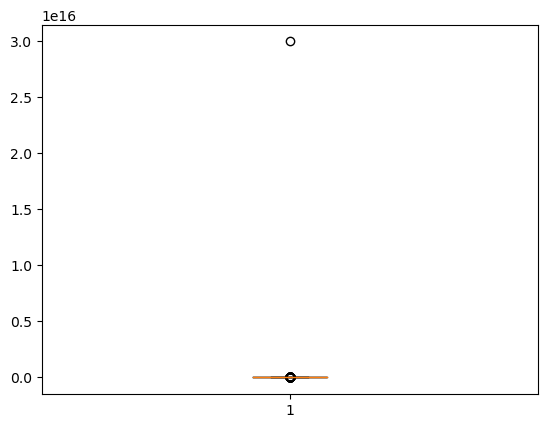

In [ ]:
plt.boxplot(high_price_car['Giá tiền'])